# Preprocessing

In [52]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#import dataset
df = pd.read_csv('../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#show columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Demoraphic Variables
| Variable       | Description                               | Data Type          |
|----------------|-------------------------------------------|--------------------|
| customerID     | Unique customer identifier                | object (string)    |
| gender         | Gender of the customer                    | object (categorical) |
| SeniorCitizen  | Whether the customer is a senior (1 = Yes)| int64 (binary)     |
| Partner        | Whether the customer has a partner        | object (Yes/No)    |
| Dependents     | Whether the customer has dependents       | object (Yes/No)    |


Contract Information
| Variable         | Description                                 | Data Type         |
|------------------|---------------------------------------------|-------------------|
| tenure           | Number of months the customer has stayed    | int64             |
| Contract         | Type of contract                            | object (categorical) |
| PaperlessBilling | Whether the customer has paperless billing  | object (Yes/No)   |
| PaymentMethod    | Payment method                              | object (categorical) |


Service Subscription
| Variable          | Description                                     | Data Type          |
|-------------------|-------------------------------------------------|--------------------|
| PhoneService      | Whether the customer has phone service          | object (Yes/No)    |
| MultipleLines     | Whether the customer has multiple phone lines   | object (Yes/No/No phone service) |
| InternetService   | Type of internet service                        | object (DSL/Fiber optic/No) |
| OnlineSecurity    | Whether the customer has online security        | object (Yes/No/No internet service) |
| OnlineBackup      | Whether the customer has online backup          | object (Yes/No/No internet service) |
| DeviceProtection  | Whether the customer has device protection      | object (Yes/No/No internet service) |
| TechSupport       | Whether the customer has technical support      | object (Yes/No/No internet service) |
| StreamingTV       | Whether the customer has streaming TV           | object (Yes/No/No internet service) |
| StreamingMovies   | Whether the customer has streaming movies       | object (Yes/No/No internet service) |


Financial Variables
| Variable        | Description                                | Data Type       |
|-----------------|--------------------------------------------|-----------------|
| MonthlyCharges  | The amount charged to the customer monthly | float64         |
| TotalCharges    | The total amount charged to the customer   | object  |

Target Variable
| Variable | Description                      | Data Type       |
|----------|----------------------------------|-----------------|
| Churn    | Whether the customer has churned | object (Yes/No) |

In [4]:
#describe statistics of numerical feautres
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
#set the index to customerID
df.set_index('customerID', inplace=True)

In [6]:
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   
...            ...            ...     ...        ...     ...          ...   
6840-RESVB    Male              0     Yes        Yes      24          Yes   
2234-XADUH  Female              0     Yes        Yes      72          Yes   
4801-JZAZL  Female              0     Yes        Yes      11           No   
8361-LTMKD    Male              1     Yes         No       4          Yes   
3186-AJIEK    Male              0      No         No      66          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   
...                      ...             ...            ...          ...   
6840-RESVB               Yes             DSL            Yes           No   
2234-XADUH               Yes     Fiber optic             No          Yes   
4801-JZAZL  No phone service             DSL            Yes           No   
8361-LTMKD               Yes     Fiber optic             No           No   
3186-AJIEK                No     Fiber optic            Yes           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   
...                     ...         ...         ...             ...   
6840-RESVB              Yes         Yes         Yes             Yes   
2234-XADUH              Yes          No         Yes             Yes   
4801-JZAZL               No          No          No              No   
8361-LTMKD               No          No          No              No   
3186-AJIEK              Yes         Yes         Yes             Yes   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   
...                    ...              ...                        ...   
6840-RESVB        One year              Yes               Mailed check   
2234-XADUH        One year              Yes    Credit card (automatic)   
4801-JZAZL  Month-to-month              Yes           Electronic check   
8361-LTMKD  Month-to-month              Yes               Mailed check   
3186-AJIEK        Two year              Yes  Bank transfer (automatic)   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.8

In [7]:
#show info about the dataset (specifically the data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Strange that TotalCharges is object and not numeric

In [8]:
#convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Missing values

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# show the rows with null values
df[df['TotalCharges'].isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
4472-LVYGI  Female              0     Yes        Yes       0           No   
3115-CZMZD    Male              0      No        Yes       0          Yes   
5709-LVOEQ  Female              0     Yes        Yes       0          Yes   
4367-NUYAO    Male              0     Yes        Yes       0          Yes   
1371-DWPAZ  Female              0     Yes        Yes       0           No   
7644-OMVMY    Male              0     Yes        Yes       0          Yes   
3213-VVOLG    Male              0     Yes        Yes       0          Yes   
2520-SGTTA  Female              0     Yes        Yes       0          Yes   
2923-ARZLG    Male              0     Yes        Yes       0          Yes   
4075-WKNIU  Female              0     Yes        Yes       0          Yes   
2775-SEFEE    Male              0      No        Yes       0          Yes   

               MultipleLines InternetService       OnlineSecurity  \
customerID                                                          
4472-LVYGI  No phone service             DSL                  Yes   
3115-CZMZD                No              No  No internet service   
5709-LVOEQ                No             DSL                  Yes   
4367-NUYAO               Yes              No  No internet service   
1371-DWPAZ  No phone service             DSL                  Yes   
7644-OMVMY                No              No  No internet service   
3213-VVOLG               Yes              No  No internet service   
2520-SGTTA                No              No  No internet service   
2923-ARZLG                No              No  No internet service   
4075-WKNIU               Yes             DSL                   No   
2775-SEFEE               Yes             DSL                  Yes   

                   OnlineBackup     DeviceProtection          TechSupport  \
customerID                                                                  
4472-LVYGI                   No                  Yes                  Yes   
3115-CZMZD  No internet service  No internet service  No internet service   
5709-LVOEQ                  Yes                  Yes                   No   
4367-NUYAO  No internet service  No internet service  No internet service   
1371-DWPAZ                  Yes                  Yes                  Yes   
7644-OMVMY  No internet service  No internet service  No internet service   
3213-VVOLG  No internet service  No internet service  No internet service   
2520-SGTTA  No internet service  No internet service  No internet service   
2923-ARZLG  No internet service  No internet service  No internet service   
4075-WKNIU                  Yes                  Yes                  Yes   
2775-SEFEE                  Yes                   No                  Yes   

                    StreamingTV      StreamingMovies  Contract  \
customerID                                                       
4472-LVYGI                  Yes                   No  Two year   
3115-CZMZD  No internet service  No internet service  Two year   
5709-LVOEQ                  Yes                  Yes  Two year   
4367-NUYAO  No internet service  No internet service  Two year   
1371-DWPAZ                  Yes                   No  Two year   
7644-OMVMY  No internet service  No internet service  Two year   
3213-VVOLG  No internet service  No internet service  Two year   
2520-SGTTA  No internet service  No internet service  Two year   
2923-ARZLG  No internet service  No internet service  One year   
4075-WKNIU                  Yes                   No  Two year   
2775-SEFEE                   No                   No  Two year   

           PaperlessBilling              PaymentMethod  MonthlyCharges  \
customerID                                                               
4472-LVYGI              Yes  Bank transfer (automatic)           52.55   
3115-CZMZD               No  

In [11]:
# only 11 out of 7032 rows have null values in TotalCharges, so let's drop them
df.dropna(subset=['TotalCharges'], inplace=True)
df['TotalCharges'].isnull().sum()

0

Let's check more deeply if there other missing values (or values outside the defined range)

In [12]:
# define possible values for each feature

possible_values = {
    "gender": ["Female","Male"],
    "SeniorCitizen": [0, 1],
    "Partner": ["No", "Yes"],
    "Dependents": ["No", "Yes"],
    "tenure": [i for i in range(0, 74)],
    "PhoneService": ["No", "Yes"],
    "MultipleLines": ["No phone service", "No", "Yes"],
    "InternetService": ["DSL", "Fiber optic", "No"],
    "OnlineSecurity": ["No", "Yes", "No internet service"],
    "OnlineBackup": ["No", "Yes", "No internet service"],
    "DeviceProtection": ["No", "Yes", "No internet service"],
    "TechSupport": ["No", "Yes", "No internet service"],
    "StreamingTV": ["No", "Yes", "No internet service"],
    "StreamingMovies": ["No", "Yes", "No internet service"],
    "Contract": ["Month-to-month", "One year", "Two year"],
    "PaperlessBilling": ["No", "Yes"],
    "PaymentMethod": ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"],
    "Churn": ["No", "Yes"],
}
# monthly charges and total charges are continuous variables, so we will not define possible values for them

In [13]:
# check if all values are in the possible values
def check_values(df, possible_values):
    for column in df.columns:
        if column in possible_values:
            values = df[column].unique()
            if not set(values).issubset(set(possible_values[column])):
                print(f"Column {column} has values {values} that are not in {possible_values[column]}")
    print("End of check")
check_values(df, possible_values)

End of check


All values in range for the defined categories. 

Check for duplicates

In [14]:
# check for duplicates
df.duplicated().sum()

22

In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Dataset Transformation

Lots of categorical variables should be binary variables. I define a routine to convert them to boolean type. I also decided to transform the variables 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', to binary variables transforming the No Internet/phone service to False. 

A new categorical variable 'InternetType' is created for assessing the type of the internet service. 

Finally, also the gender variable is transformed in a binary variable 'IsMale', which is True if gender is Male, False otherwise

In [18]:
# make binary values boolean values
def make_binary_values(df, possible_values):
    for column in df.columns:
        if column in possible_values:
            if set(possible_values[column]) == {0, 1}:
                df[column] = df[column].astype(bool)
            elif set(possible_values[column]) == {"No", "Yes"}:
                df[column] = df[column].map({"No": False, "Yes": True})
            elif set(possible_values[column]) == {"Female", "Male"}:
                df[column] = df[column].map({"Female": False, "Male": True})
            # if set of possible include Yes, No and some other value then transform to boolean and replace the other value with NaN
            elif set(possible_values[column]) == {"No", "Yes", "No internet service"}:
                df[column] = df[column].map({"No": False, "Yes": True, "No internet service": False})
            elif set(possible_values[column]) == {"No", "Yes", "No phone service"}:
                df[column] = df[column].map({"No": False, "Yes": True, "No phone service": False})
            
            # transform the internet service to boolean values
            elif set(possible_values[column]) == {"DSL", "Fiber optic", "No"}:
                df[column] = df[column].map({"DSL": True, "Fiber optic": True, "No": False})

                
    return df

In [19]:
df_new = df.copy()
df_new = make_binary_values(df_new, possible_values)

In [20]:
# rename gender column with IsMale
df_new['IsMale'] = df_new['gender']
df_new.drop(['gender'], axis=1, inplace=True)


In [21]:
#create new column for internet type (DSL or Fiber optic)
df_new['InternetType'] = df['InternetService'].apply(lambda x: 'DSL' if x == 'DSL' else 'Fiber optic')


In [24]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7010 non-null   bool   
 1   Partner           7010 non-null   bool   
 2   Dependents        7010 non-null   bool   
 3   tenure            7010 non-null   int64  
 4   PhoneService      7010 non-null   bool   
 5   MultipleLines     7010 non-null   bool   
 6   InternetService   7010 non-null   bool   
 7   OnlineSecurity    7010 non-null   bool   
 8   OnlineBackup      7010 non-null   bool   
 9   DeviceProtection  7010 non-null   bool   
 10  TechSupport       7010 non-null   bool   
 11  StreamingTV       7010 non-null   bool   
 12  StreamingMovies   7010 non-null   bool   
 13  Contract          7010 non-null   object 
 14  PaperlessBilling  7010 non-null   bool   
 15  PaymentMethod     7010 non-null   object 
 16  MonthlyCharges    7010 non-null 

In [23]:
df_new.describe()

tenure  MonthlyCharges  TotalCharges
count  7010.000000     7010.000000   7010.000000
mean     32.520399       64.888666   2290.353388
std      24.520441       30.064769   2266.820832
min       1.000000       18.250000     18.800000
25%       9.000000       35.750000    408.312500
50%      29.000000       70.400000   1403.875000
75%      56.000000       89.900000   3807.837500
max      72.000000      118.750000   8684.800000

Now we have 15 boolean variables, 3 numerical ones and 3 categorical. In detail:


In [26]:
# print the boolean variables, then the numerical variables and finally the categorical variables
def print_dataframe_info(df):
    print("Boolean variables:")
    print(df.select_dtypes(include=[bool]).columns)
    print("\nNumerical variables:")
    print(df.select_dtypes(include=[np.number]).columns)
    print("\nCategorical variables:")
    print(df.select_dtypes(include=[object]).columns)
print_dataframe_info(df_new)

Boolean variables:
Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Churn', 'IsMale'],
      dtype='object')

Numerical variables:
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Categorical variables:
Index(['Contract', 'PaymentMethod', 'InternetType'], dtype='object')


Let's one-hot-encode the categorical variables

In [27]:
# one-hot encode the categorical features
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
# one-hot encode the categorical features
categorical_features = ['Contract', 'PaymentMethod', 'InternetType']
df_new = one_hot_encode(df_new, categorical_features)


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7010 non-null   bool   
 1   Partner                                  7010 non-null   bool   
 2   Dependents                               7010 non-null   bool   
 3   tenure                                   7010 non-null   int64  
 4   PhoneService                             7010 non-null   bool   
 5   MultipleLines                            7010 non-null   bool   
 6   InternetService                          7010 non-null   bool   
 7   OnlineSecurity                           7010 non-null   bool   
 8   OnlineBackup                             7010 non-null   bool   
 9   DeviceProtection                         7010 non-null   bool   
 10  TechSupport                           

## Distributions of variable

Let's see the distributions of all the variables based on the target variable (churned or not churned)

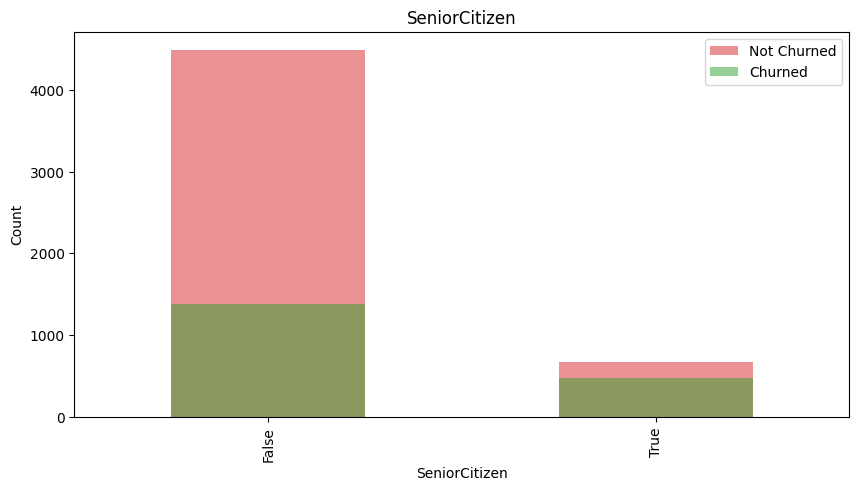

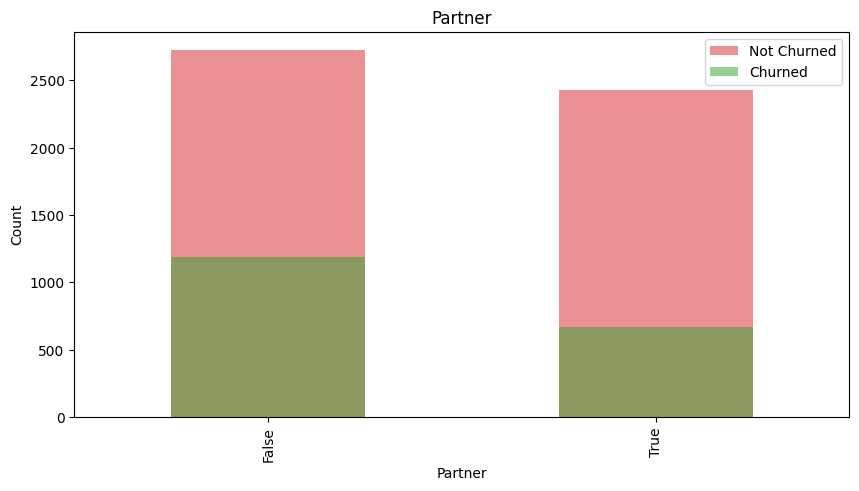

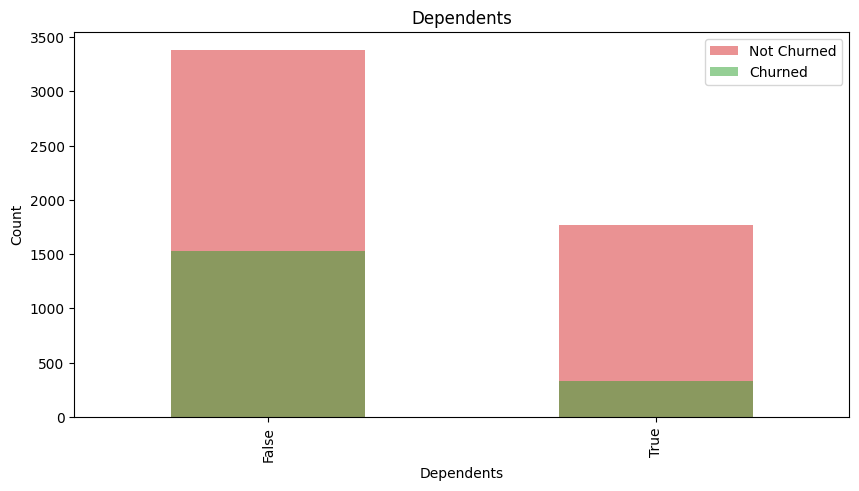

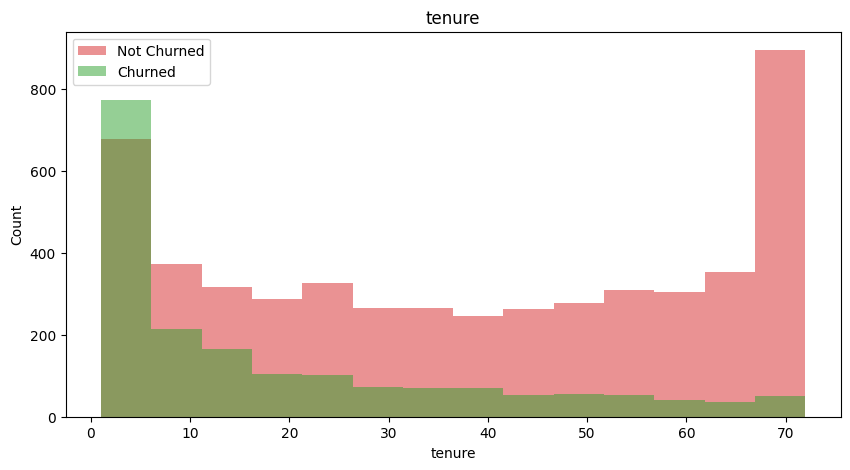

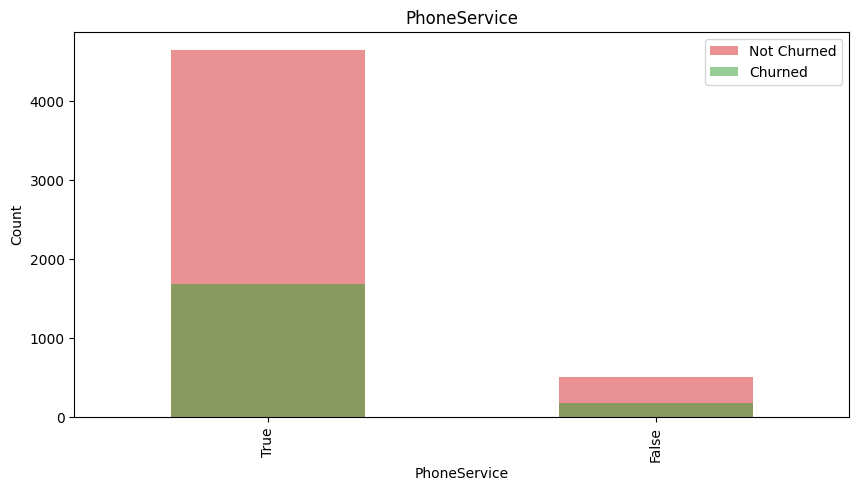

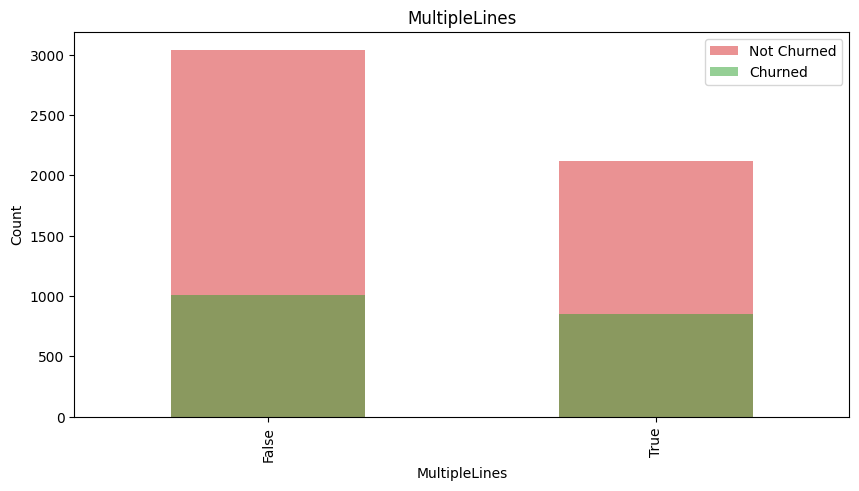

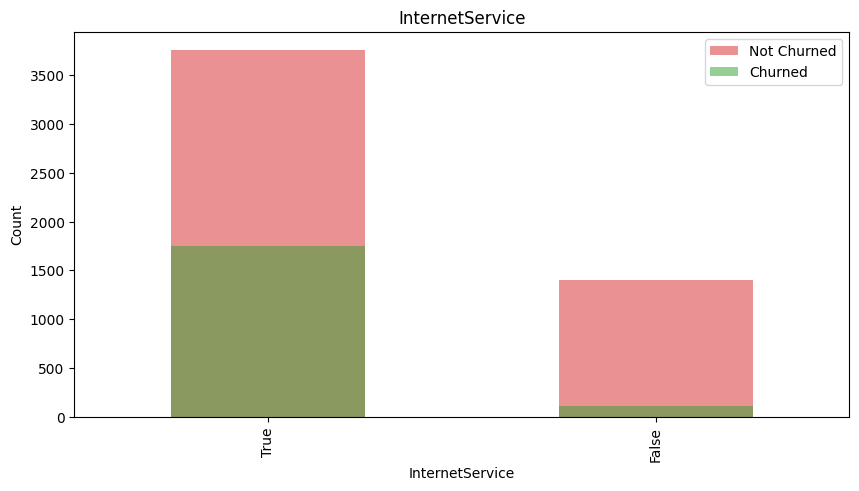

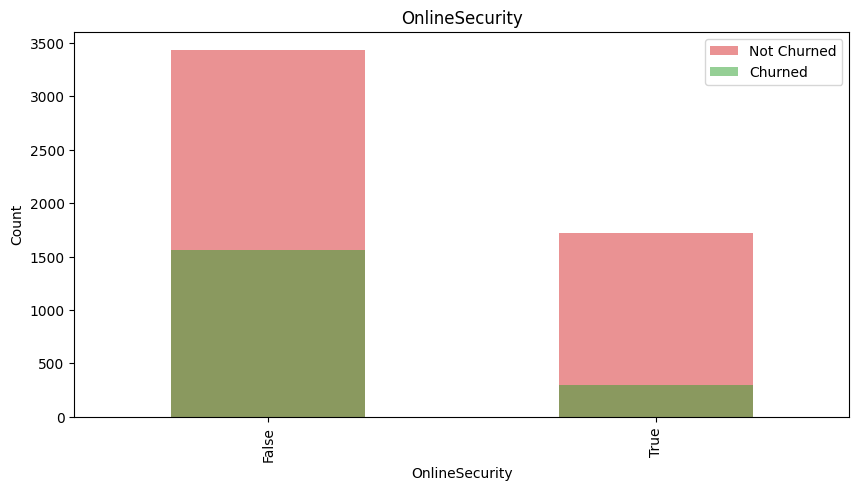

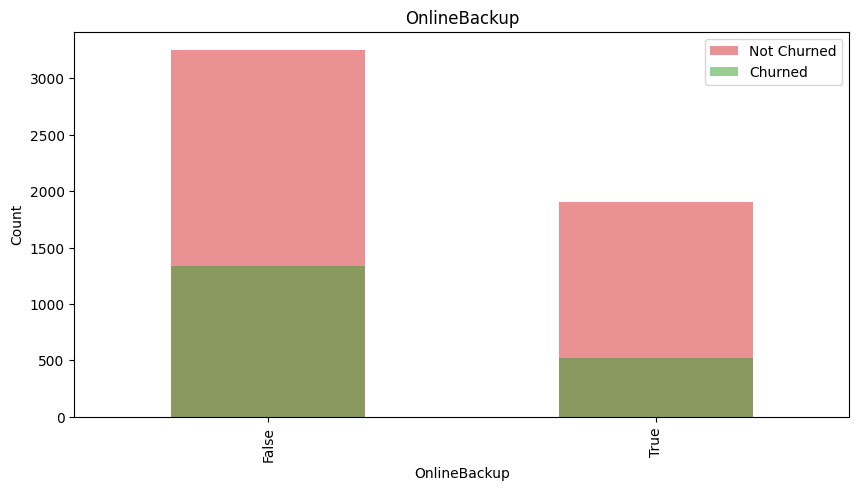

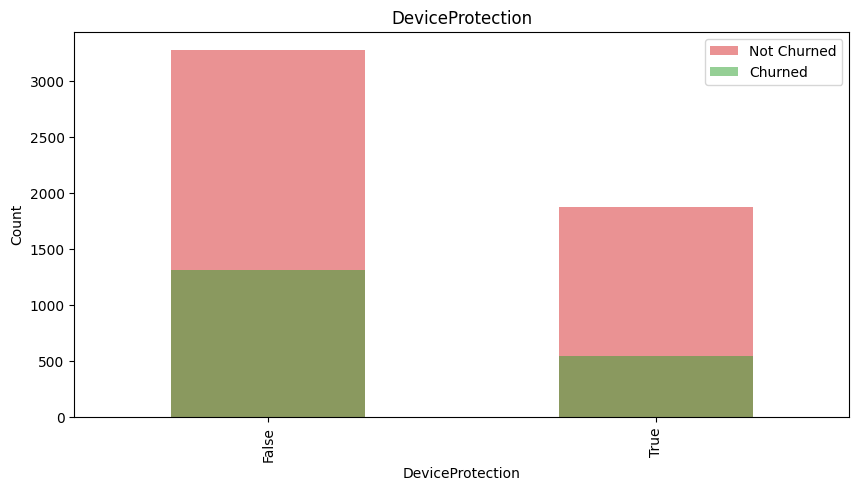

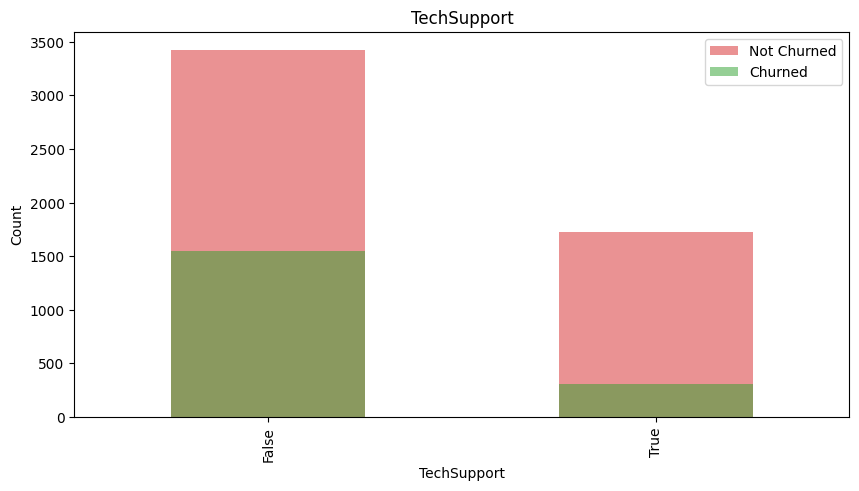

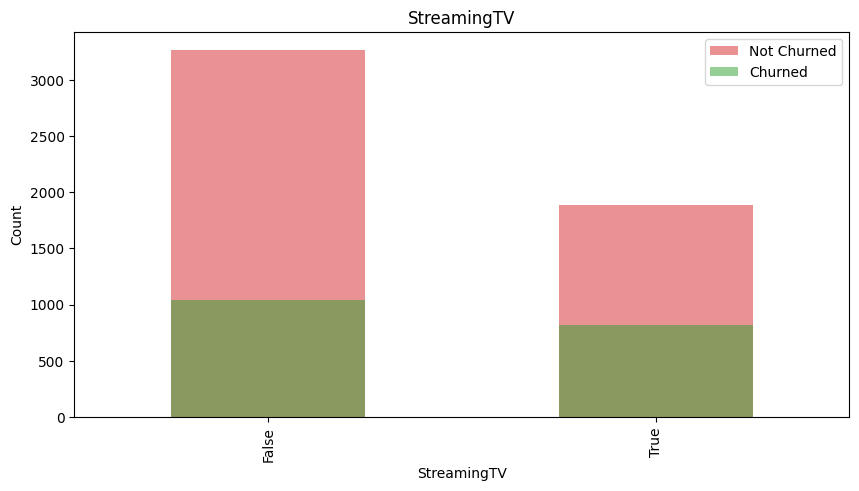

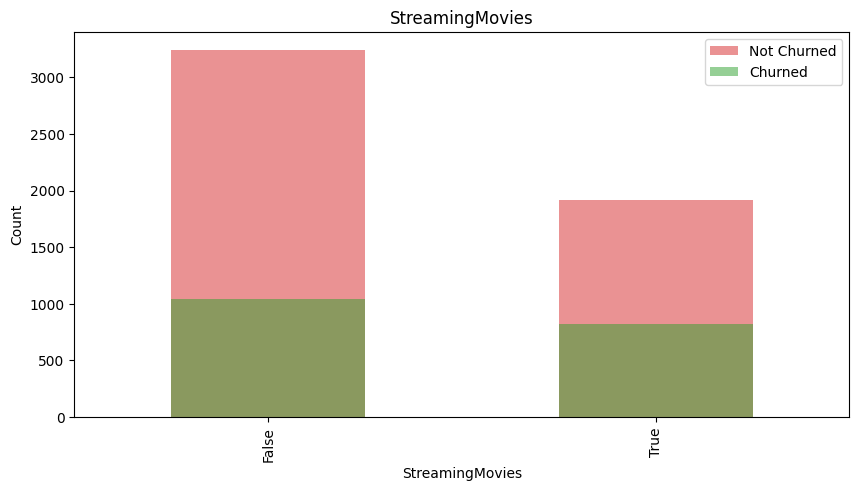

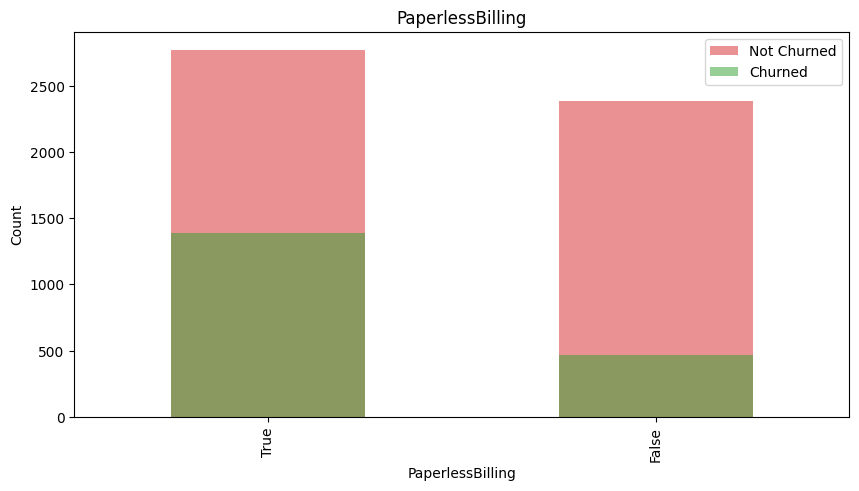

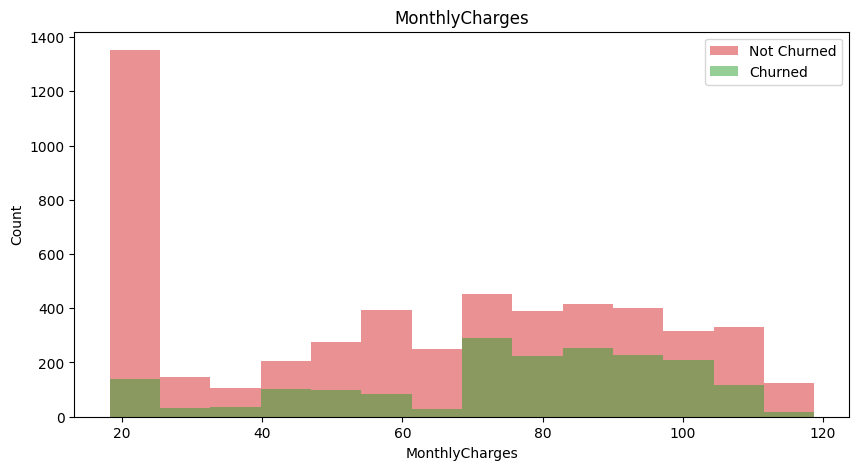

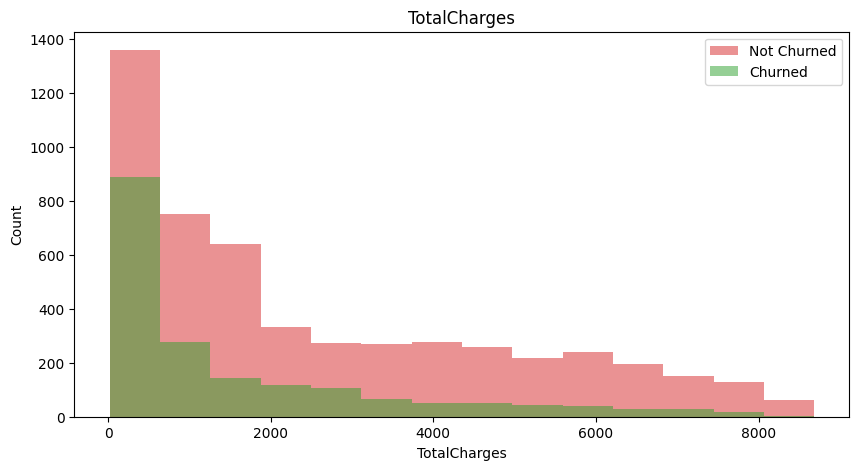

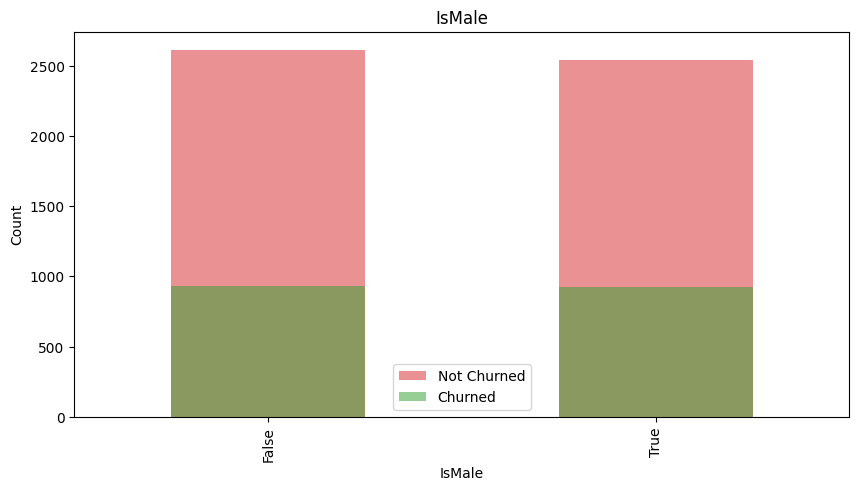

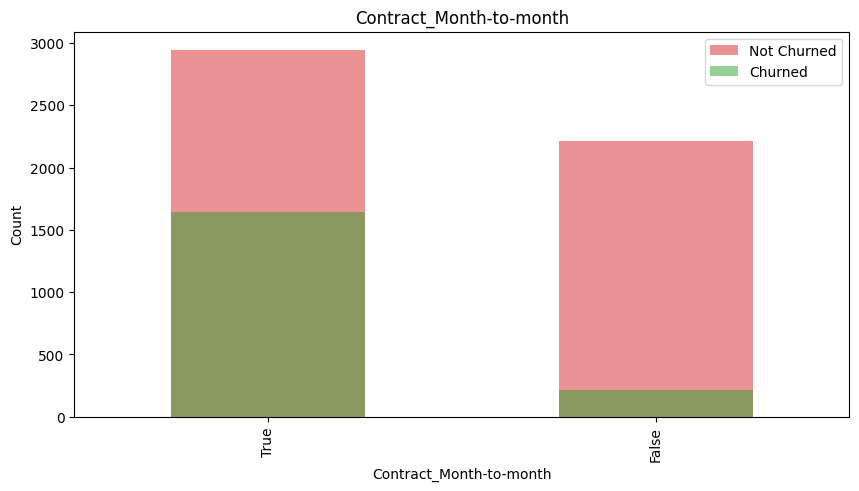

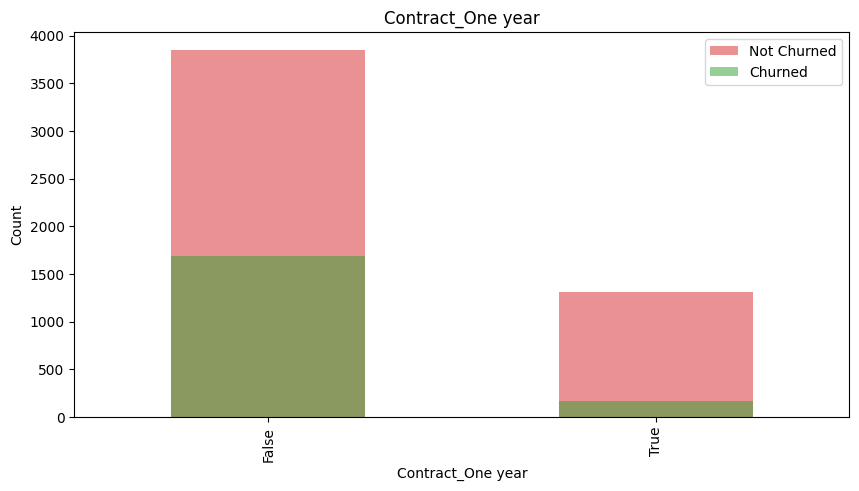

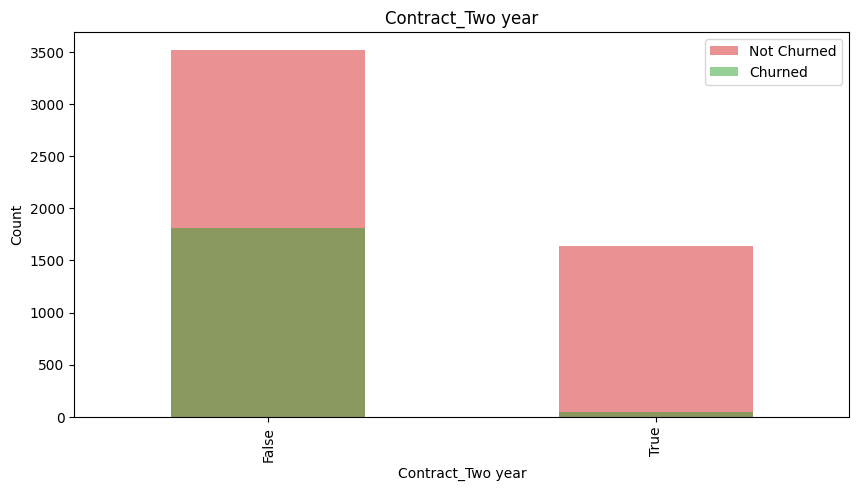

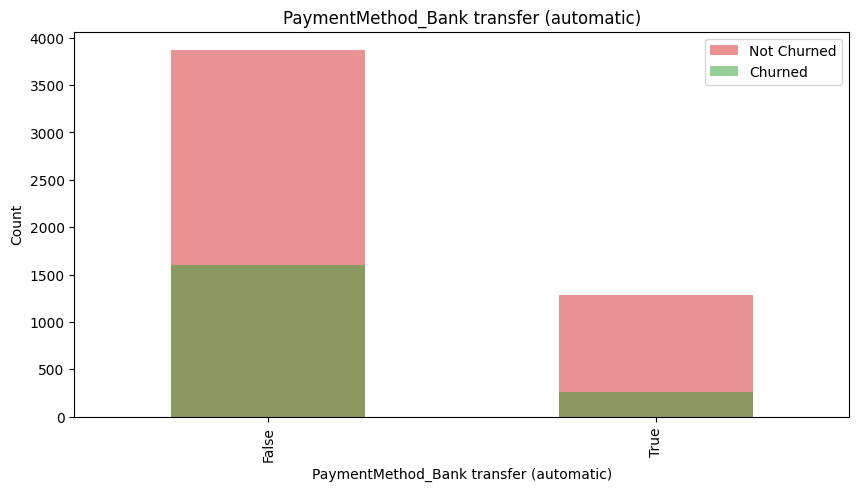

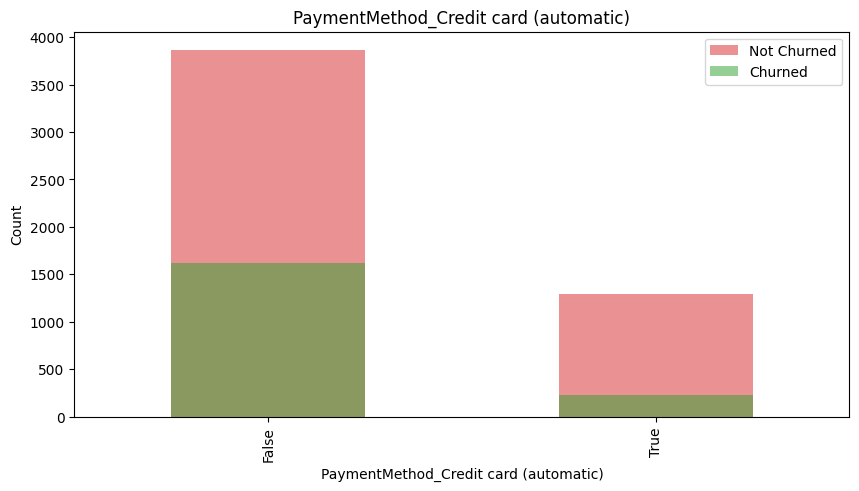

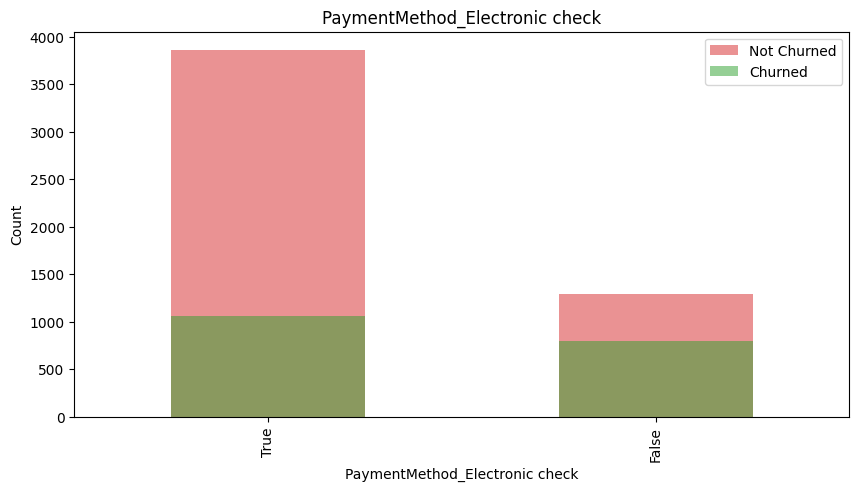

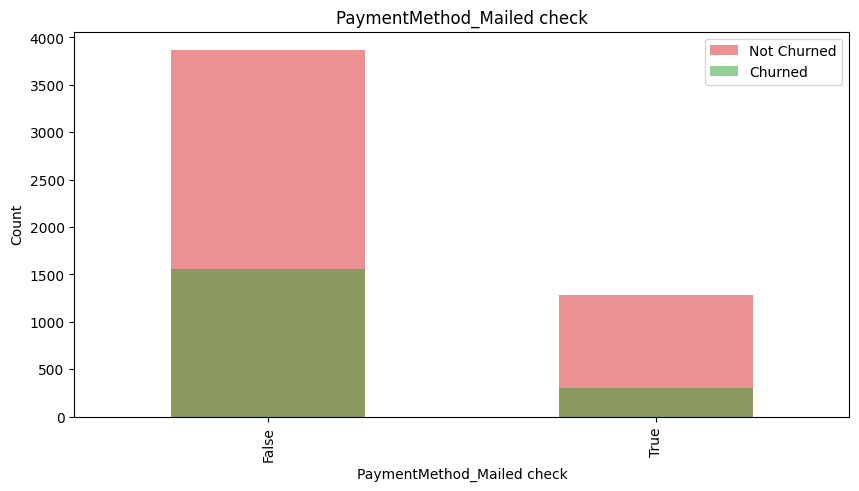

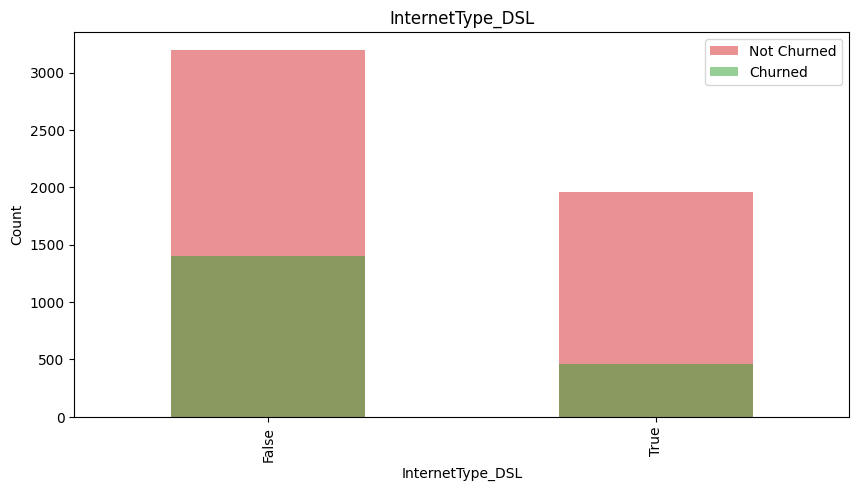

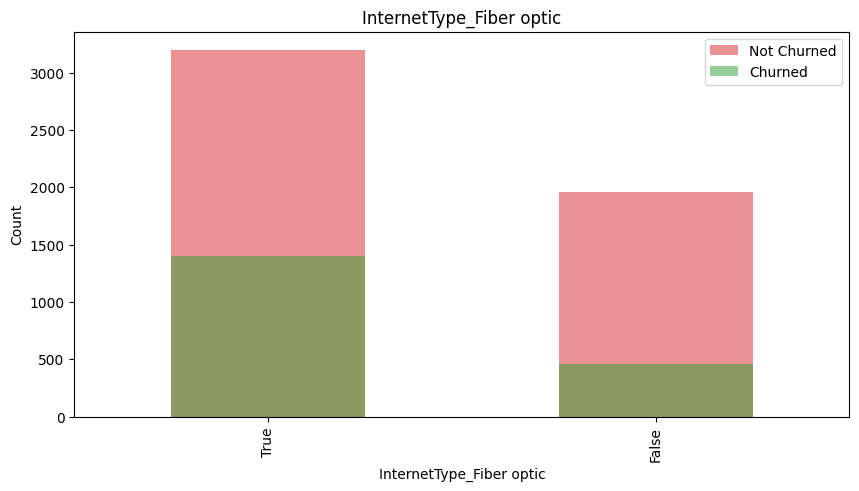

In [32]:
# churned customers
df_churned = df_new[df_new['Churn'] == True]
# not churned customers
df_not_churned = df_new[df_new['Churn'] == False]

#make histogram of all numerical features color coded by churn
def make_histogram(df_churn, df_not_churned, column):
    plt.figure(figsize=(10, 5))
    # same bins for both histograms
    bins = np.linspace(min(df_churn[column].min(), df_not_churned[column].min()),
                       max(df_churn[column].max(), df_not_churned[column].max()), 15)
    plt.hist(df_not_churned[column], bins=bins, color='tab:red', alpha=0.5, label='Not Churned')
    plt.hist(df_churn[column], bins=bins, color='tab:green', alpha=0.5, label='Churned')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

#make bar plot of all categorical features color coded by churn
def make_bar_plot(df_churn, df_not_churned, column):
    plt.figure(figsize=(10, 5))
    df_not_churned[column].value_counts().plot(kind='bar', color='tab:red', alpha=0.5, label='Not Churned')
    df_churn[column].value_counts().plot(kind='bar', color='tab:green', alpha=0.5, label='Churned')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
def make_plots(df_churn, df_not_churned):
    for column in df_churn.columns:
        #if column is numerical
        if df_churn[column].dtype in ['int64', 'float64']:
            make_histogram(df_churn, df_not_churned, column)
# make bar plots for all categorical features
        elif df_churn[column].dtype == 'object' and column != 'customerID':
            make_bar_plot(df_churn, df_not_churned, column)
        elif df_churn[column].dtype == 'bool' and column != 'Churn':
            make_bar_plot(df_churn, df_not_churned, column)
make_plots(df_churned, df_not_churned)

## Correlation studies

In [33]:
# create a new dataset where the numerical features are rescaled to the range [0, 1]
def rescale(df):
    df_rescaled = df.copy()
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            min_value = df[column].min()
            max_value = df[column].max()
            df_rescaled[column] = (df[column] - min_value) / (max_value - min_value)
    return df_rescaled
df_rescaled = rescale(df_new)

In [34]:
corrmat = df_rescaled.corr()

In [36]:
mask = np.triu(np.ones_like(corrmat, dtype=bool))

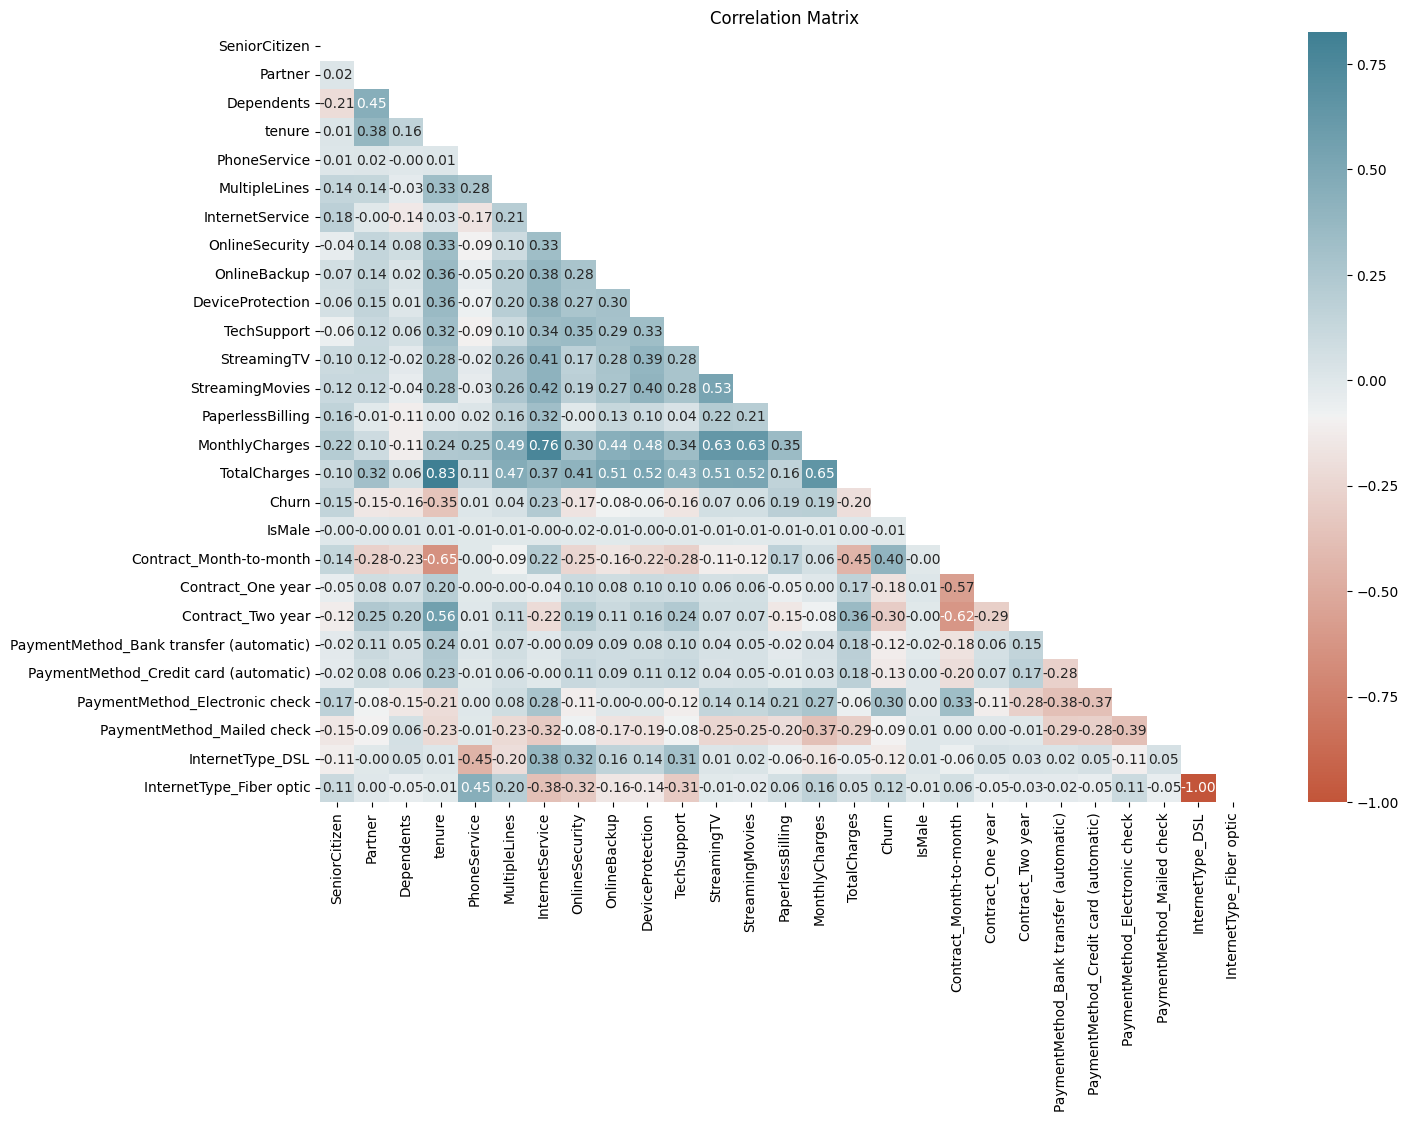

In [37]:
# make a heatmap of the correlation matrix

plt.figure(figsize=(15, 10))
sns.heatmap(df_rescaled.corr(), annot=True, cmap=sns.diverging_palette(20,220,as_cmap=True), fmt='.2f',mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [38]:
# take all the elements in the matrix and order them by correlation. Then print the pairwise variables with the highest correlation
def get_top_correlations(df, n=10, order=False):
    corr = df.corr()
    corr = corr.unstack().sort_values(ascending=order)
    corr = corr[corr < 1]
    # keep only the even index (for removing the duplicates)
    corr = corr[::2]
    return corr.head(n)
# get the top 10 correlations
top_correlations = get_top_correlations(df_rescaled, n=10)
print(top_correlations)
# get the bottom 10 correlations
bottom_correlations = get_top_correlations(df_rescaled, n=10, order=True)
print(bottom_correlations)


TotalCharges      tenure               0.825293
MonthlyCharges    InternetService      0.762181
                  TotalCharges         0.650540
                  StreamingTV          0.629336
                  StreamingMovies      0.626885
tenure            Contract_Two year    0.563273
StreamingTV       StreamingMovies      0.532456
DeviceProtection  TotalCharges         0.521863
StreamingMovies   TotalCharges         0.518704
StreamingTV       TotalCharges         0.514548
dtype: float64
InternetType_DSL                         InternetType_Fiber optic                -1.000000
tenure                                   Contract_Month-to-month                 -0.648215
Contract_Two year                        Contract_Month-to-month                 -0.621445
Contract_Month-to-month                  Contract_One year                       -0.569560
InternetType_DSL                         PhoneService                            -0.452245
TotalCharges                             Contract_

In [39]:
# calculate the correlation between each feature and the target variable
correlation = df_new.corr()['Churn'].sort_values(ascending=False)
# print the correlation values
print(correlation)


Churn                                      1.000000
Contract_Month-to-month                    0.404346
PaymentMethod_Electronic check             0.301079
InternetService                            0.228220
MonthlyCharges                             0.194008
PaperlessBilling                           0.190518
SeniorCitizen                              0.151270
InternetType_Fiber optic                   0.124152
StreamingTV                                0.065058
StreamingMovies                            0.062670
MultipleLines                              0.041888
PhoneService                               0.011072
IsMale                                    -0.008694
DeviceProtection                          -0.064978
OnlineBackup                              -0.081145
PaymentMethod_Mailed check                -0.091649
PaymentMethod_Bank transfer (automatic)   -0.117442
InternetType_DSL                          -0.124152
PaymentMethod_Credit card (automatic)     -0.134052
Partner     

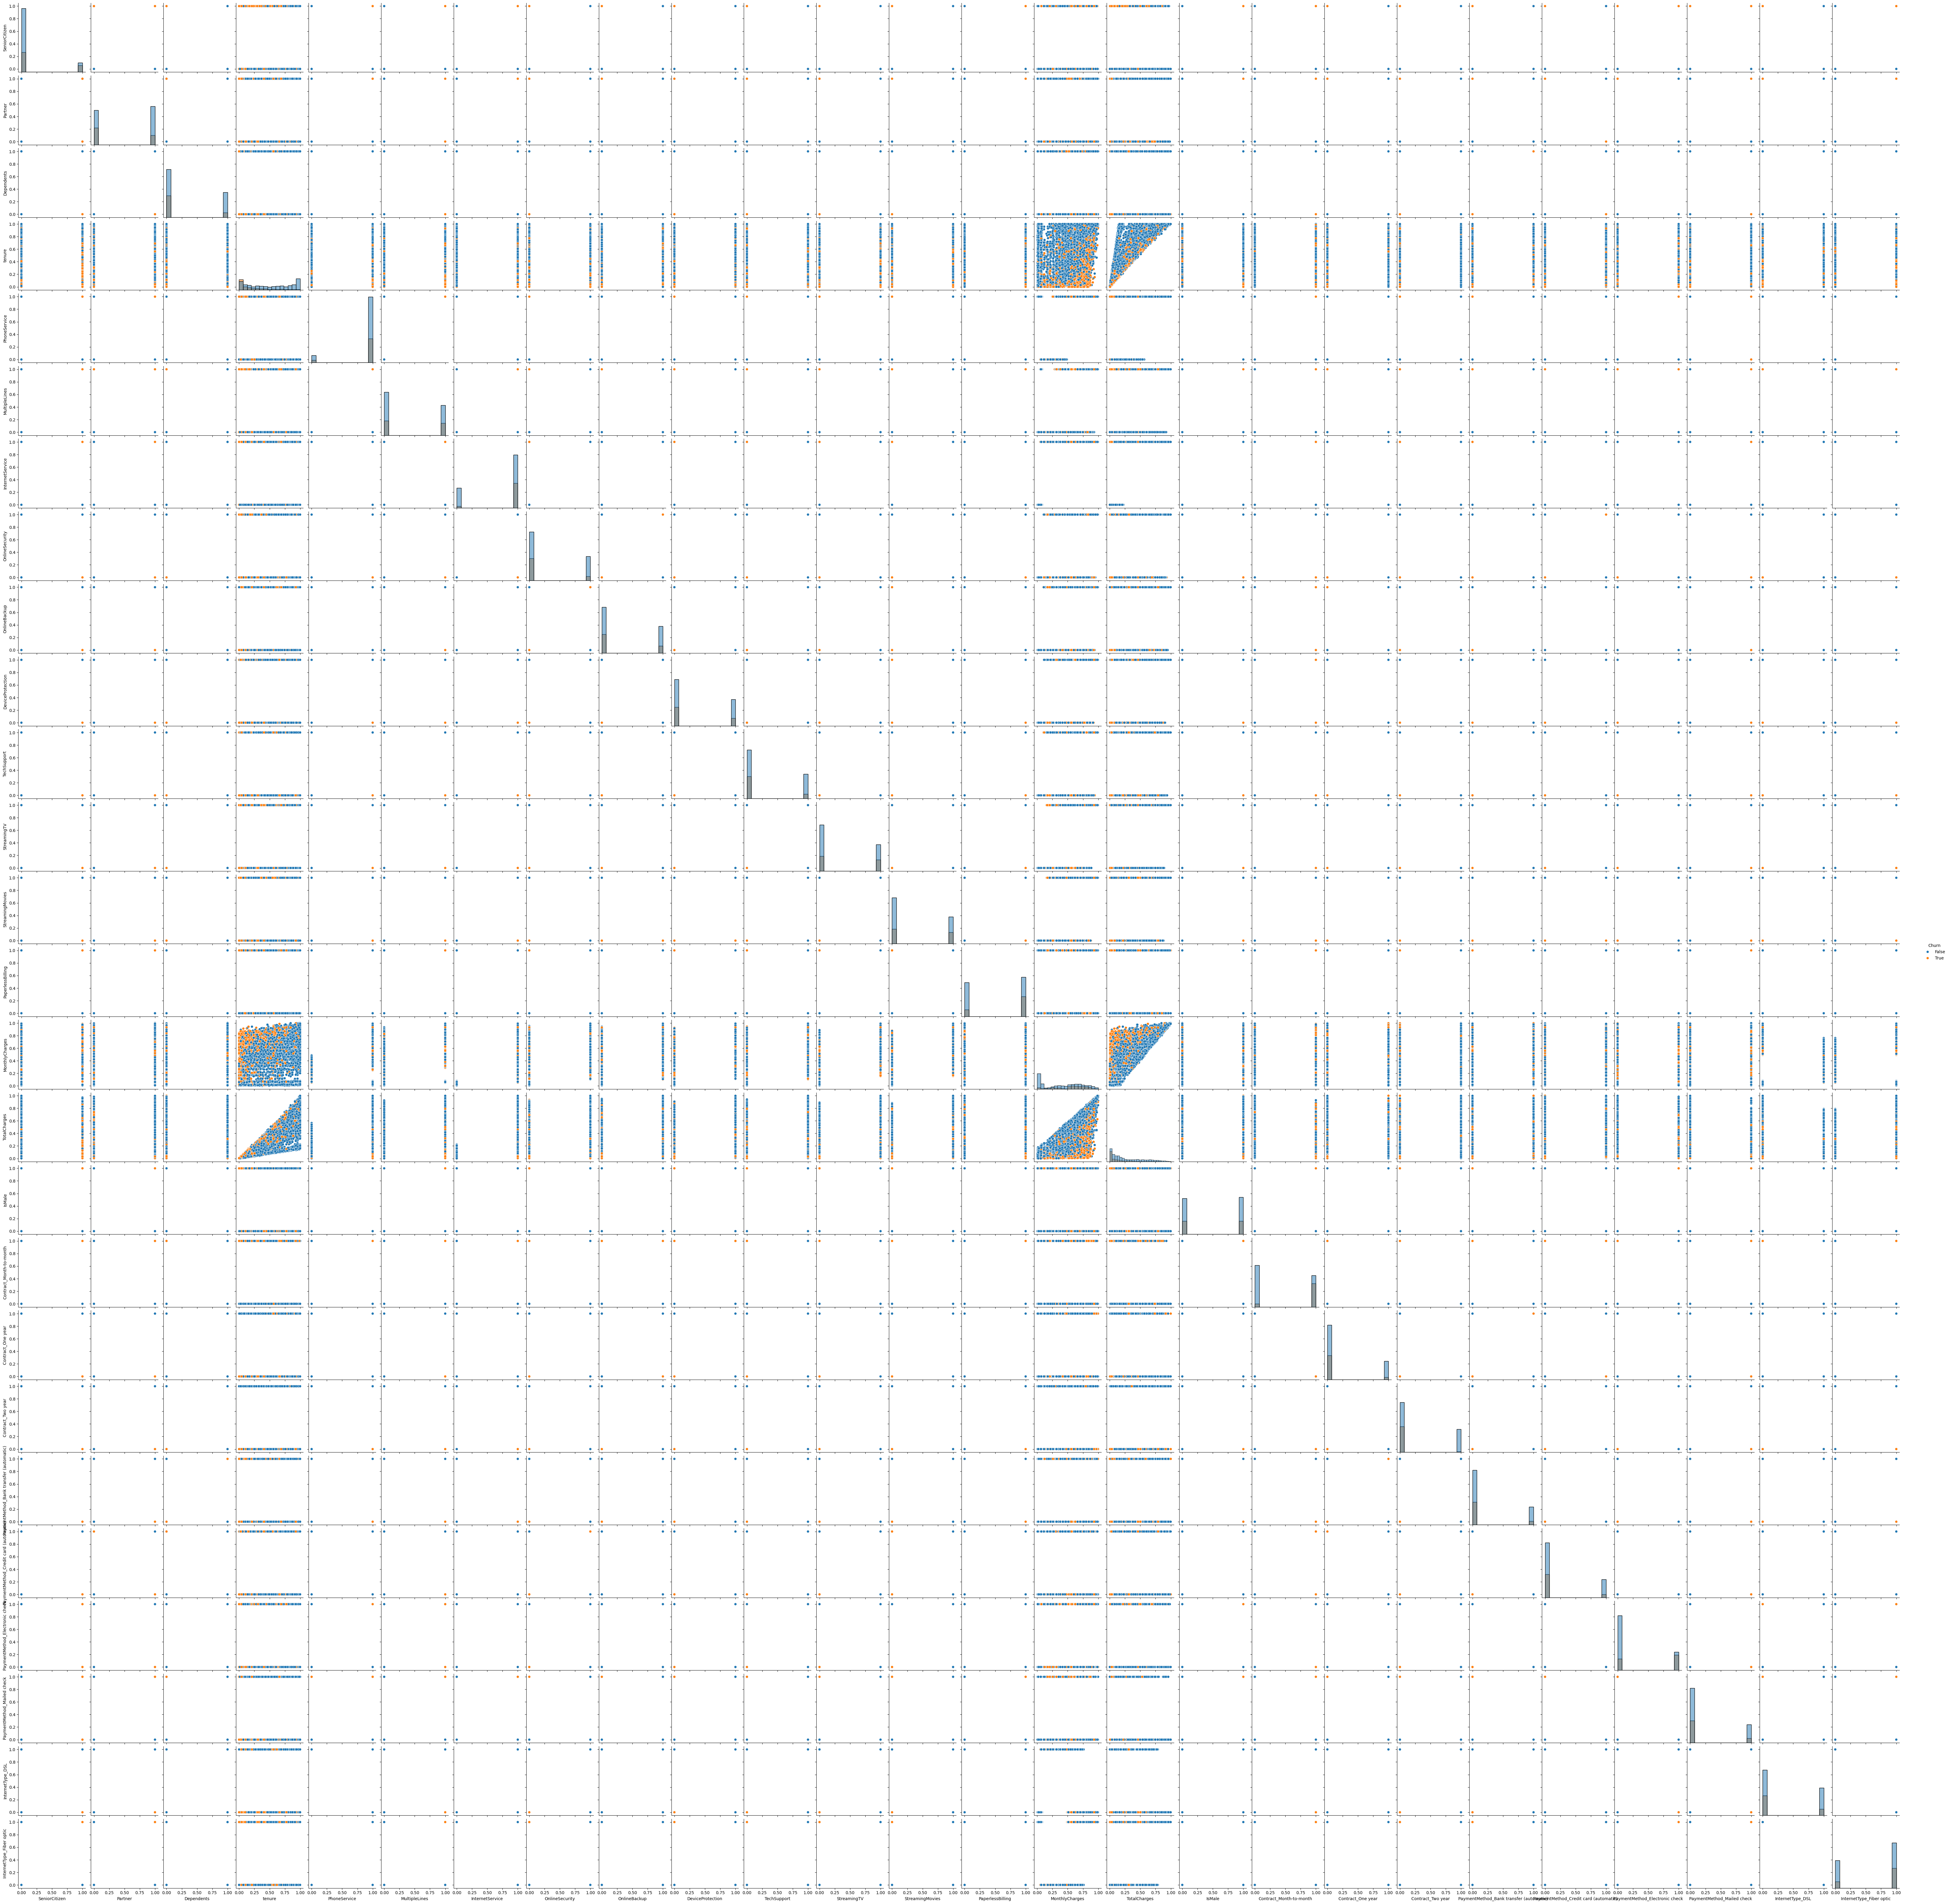

In [78]:
sns.pairplot(df_rescaled, hue='Churn', diag_kind='hist')

## New Features

In [41]:
# scale the dataset with the standard scaler
scaler = preprocessing.StandardScaler()
X = df_new.drop(['Churn'], axis=1)
X = scaler.fit_transform(X)
y = df_new['Churn']

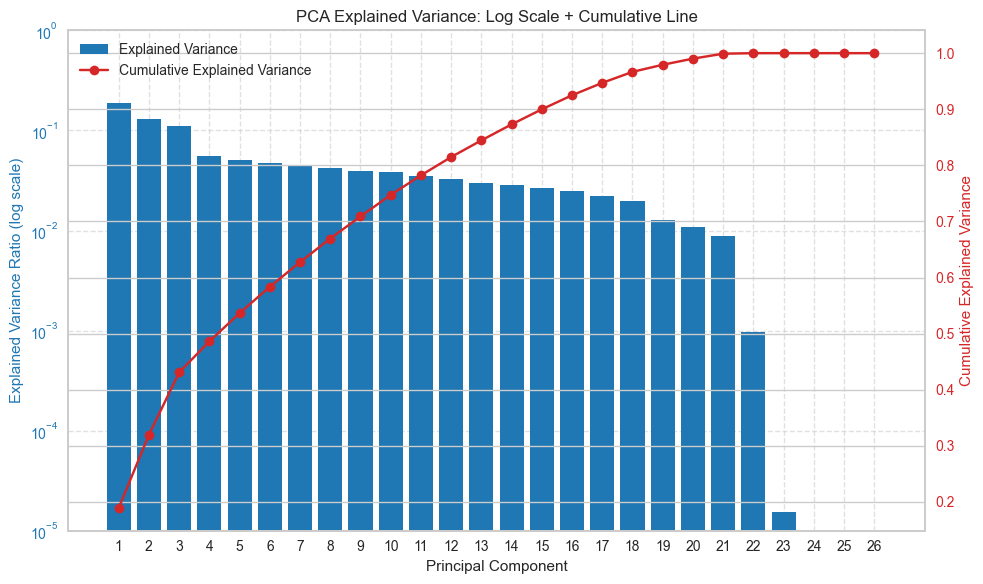

In [71]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Varianza spiegata
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var) + 1)

# Creazione del plot con doppio asse y
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot su asse y sinistro (logaritmico)
ax1.bar(components, explained_var, color='tab:blue', alpha=1, label='Explained Variance')
ax1.set_yscale('log')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio (log scale)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(components)

# Secondo asse y per la varianza cumulativa (lineare)
ax2 = ax1.twinx()
ax2.plot(components, cum_explained_var, color='tab:red', marker='o', label='Cumulative Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titolo e griglia
plt.title('PCA Explained Variance: Log Scale + Cumulative Line')
ax1.grid(True, linestyle='--', alpha=0.6)

#limiti sull'asse y sinistro a 10^-7
ax1.set_ylim(1e-5, 1)
# Legenda combinata
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')


plt.tight_layout()
plt.show()

Last 4/5 variables are redunant (probably linear combinations of the others). One example may be totalcharges which is surely a combination of monthlycharge and tenure. Another redunant variable is the one-hot-encoded internet type since it's binary (DSL vs Fiber optics)

In [73]:
# apply PCA with 21 components
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X)

For the sake of visualisation, let's explore the first three PCs which are the most significant ones with respect to the others

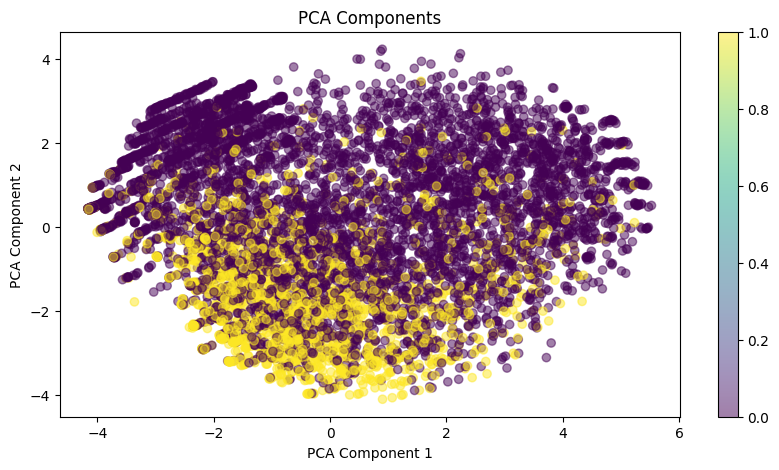

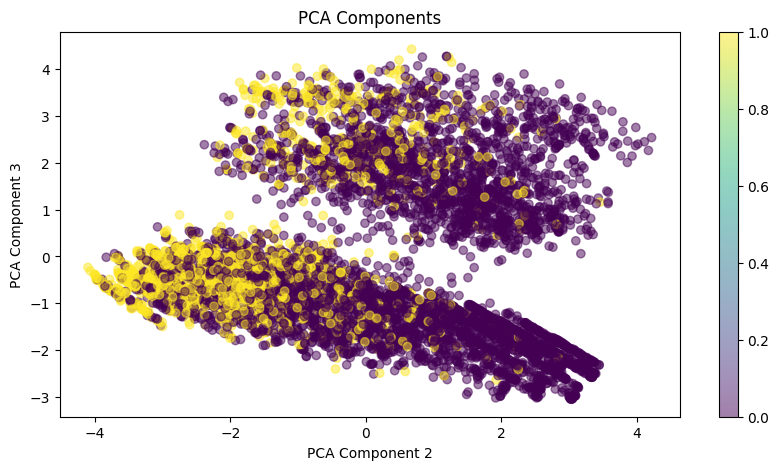

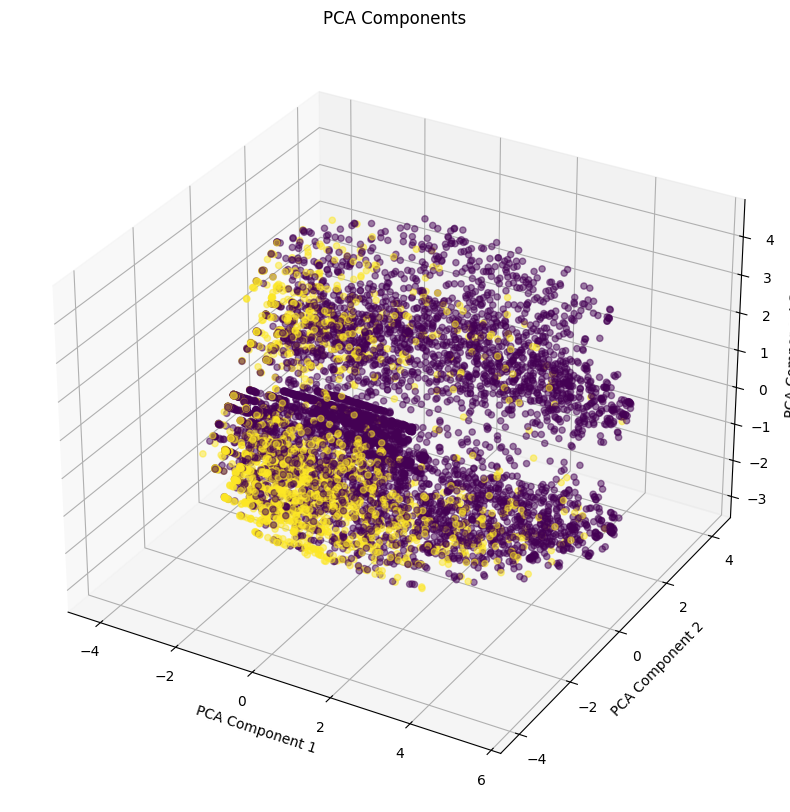

In [50]:

# plot the PCA components
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.title('PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
# plot the PCA components
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y, alpha=0.5)
plt.title('PCA Components')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.colorbar()
plt.show()
# plot the PCA components with 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, alpha=0.5)  
ax.set_title('PCA Components')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()




# Clustering

## K-Means

Clustering with original dataset

In [53]:
# normalize with minmax scaler
scaler = MinMaxScaler()
X = df_new.drop(['Churn'], axis=1)
X = scaler.fit_transform(X)

y = df_new['Churn']

In [54]:
df_clustering = df_rescaled.copy()
df_clustering.drop(['Churn'], axis=1, inplace=True)


In [55]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

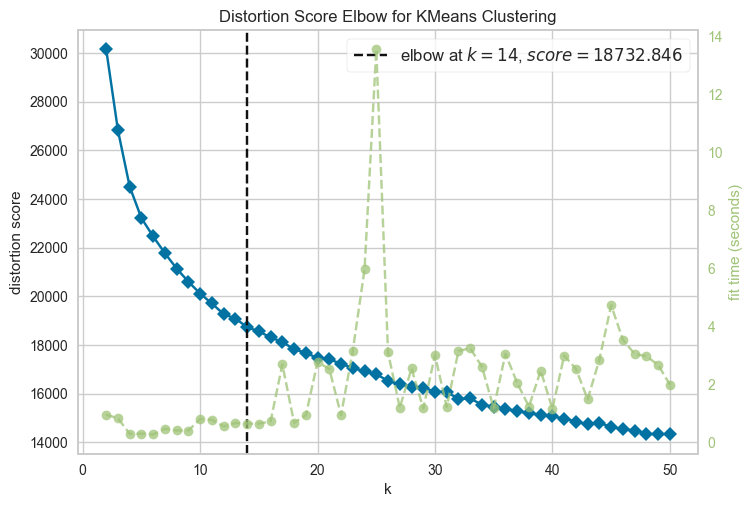

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# Quick examination of elbow method to find numbers of clusters to make.

Elbow_M = KElbowVisualizer(KMeans(), k=50)
Elbow_M.fit(df_clustering)
Elbow_M.show()

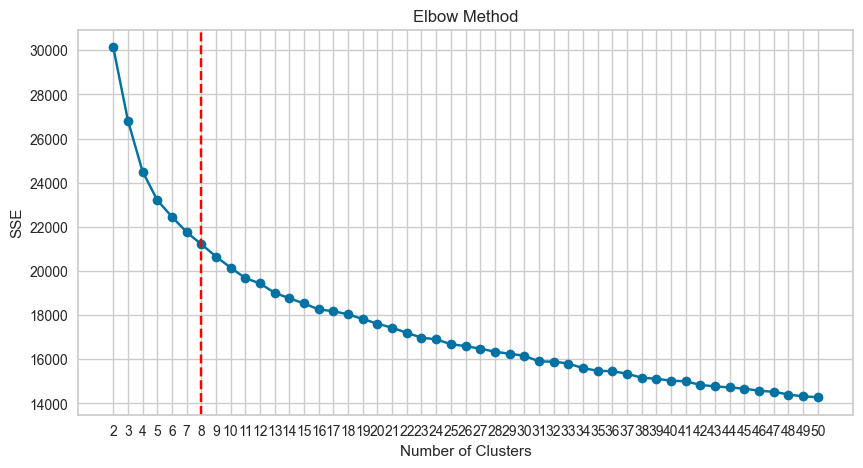

In [63]:
# plot the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_k + 1), sse_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(2, max_k + 1))
plt.grid(True)
plt.axvline(x=8, color='red', linestyle='--', label='Optimal k')
plt.show()


In [ ]:
# apply kmeans with 14 clusters
kmeans = KMeans(n_clusters=14, n_init=10, max_iter=300)
kmeans.fit(df_clustering)


KMeans(n_clusters=14, n_init=10)

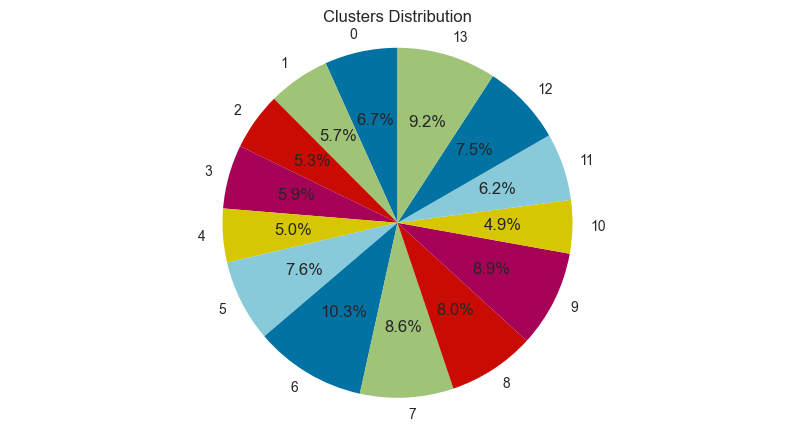

In [76]:
df_clustering['clusters'] = kmeans.labels_
# plot the clusters with plotly
plt.figure(figsize=(10, 5))
pie = df_clustering.groupby('clusters').size().reset_index(name='counts')
pie_labels = pie['clusters'].astype(str)
plt.pie(pie['counts'], labels=pie_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Clusters Distribution')
plt.show()

In [78]:
# get boolean features in dataset
bool_features = df_clustering.select_dtypes(include=[bool]).columns
# get numerical features in dataset
num_features = df_clustering.select_dtypes(include=[np.number]).columns

In [80]:
num_features = num_features.drop('clusters')

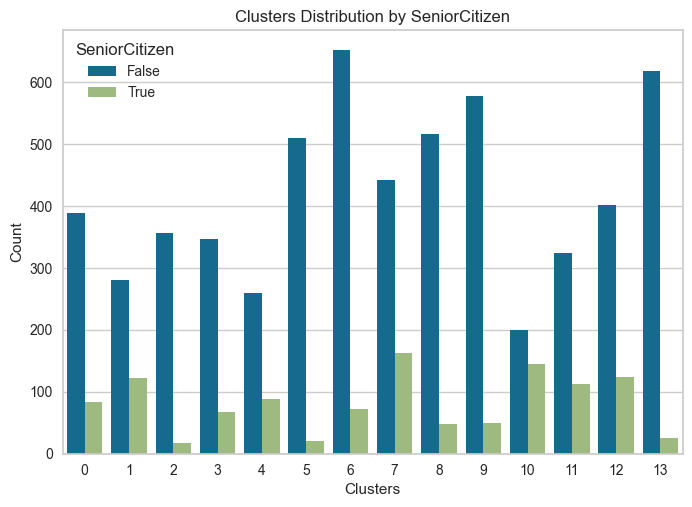

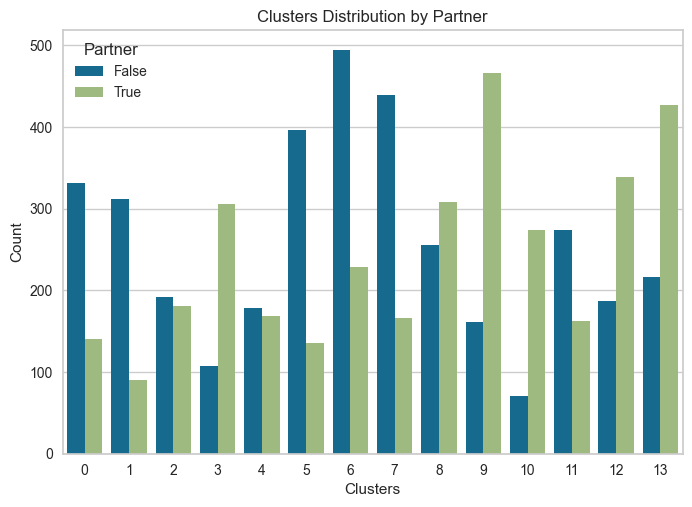

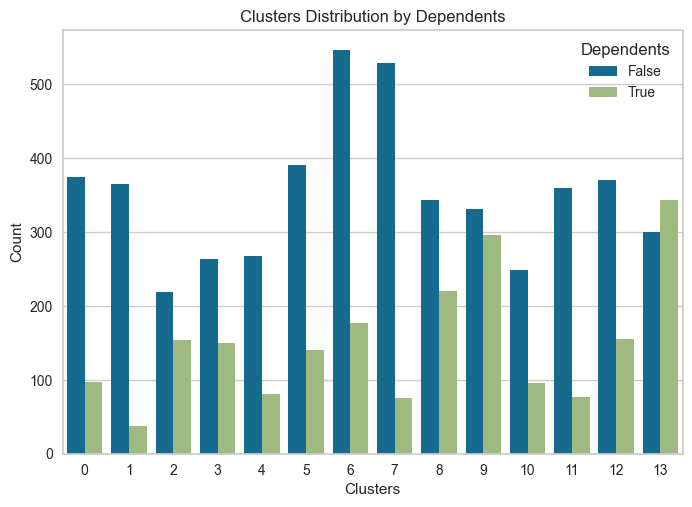

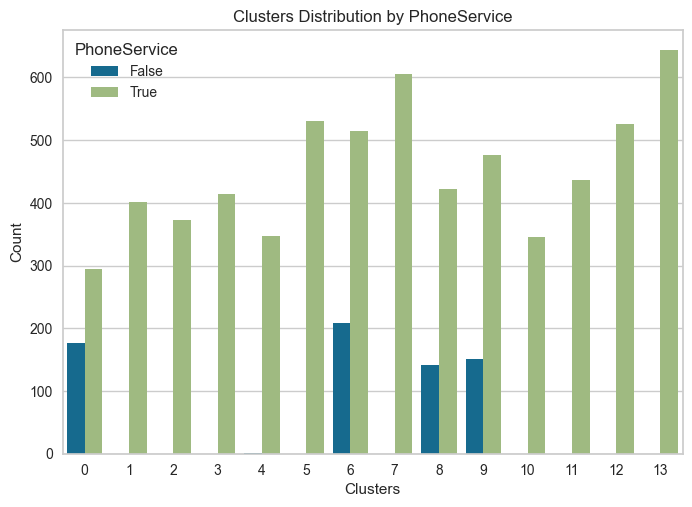

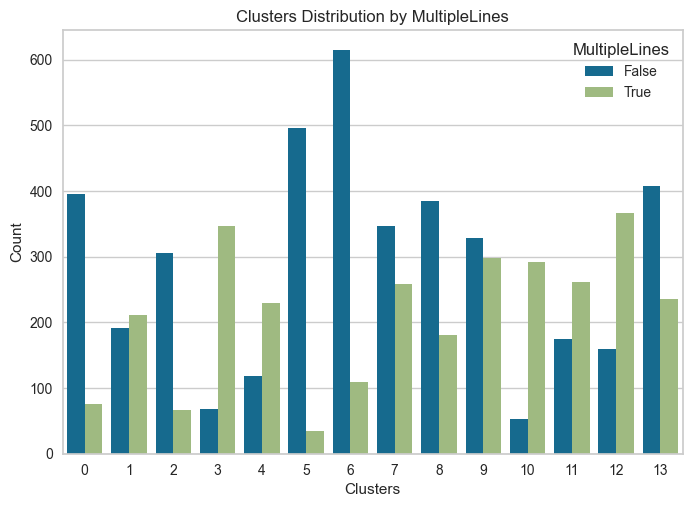

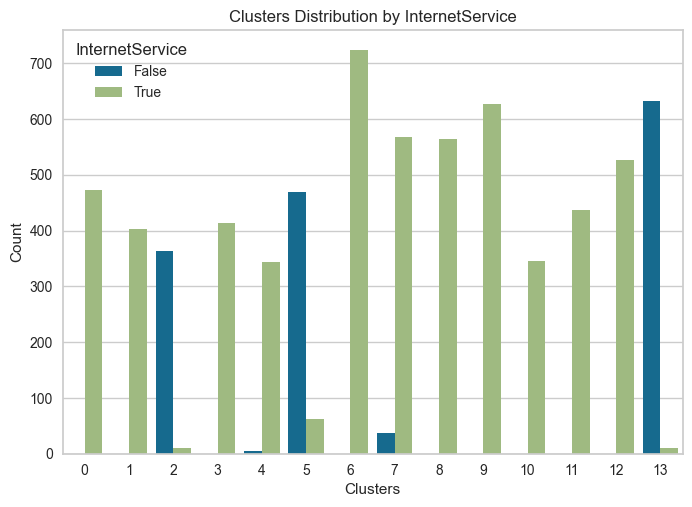

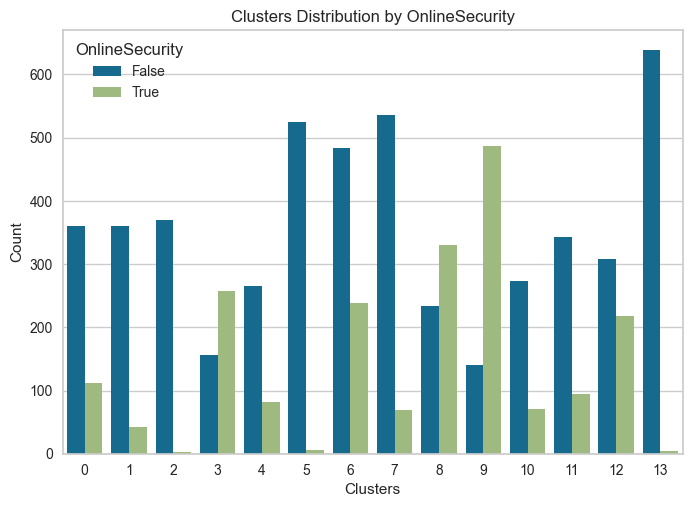

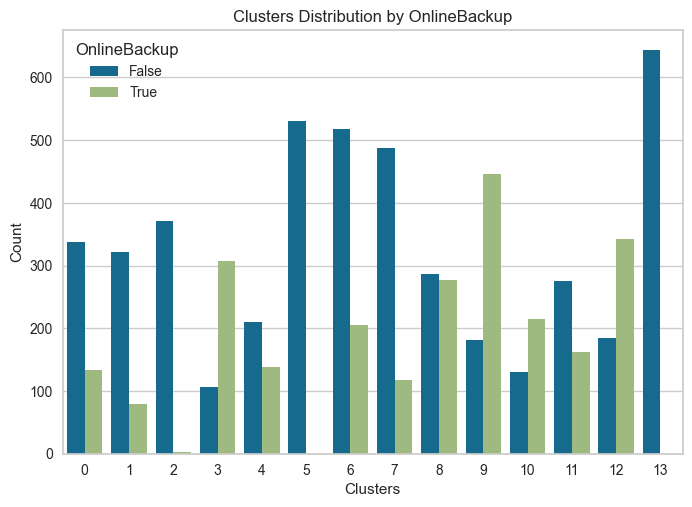

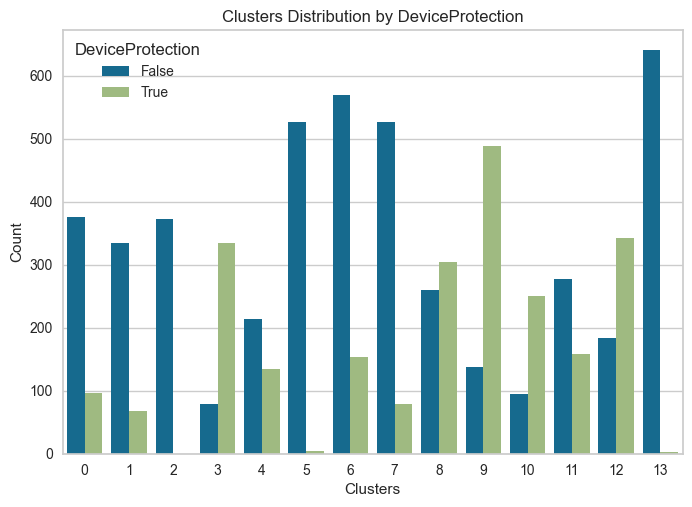

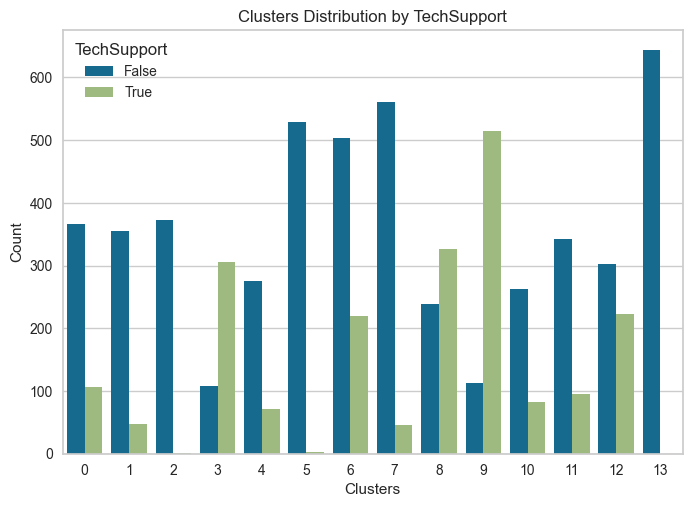

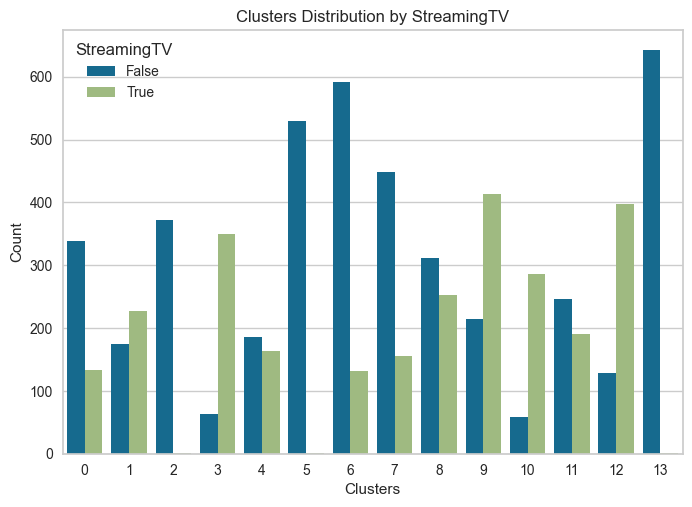

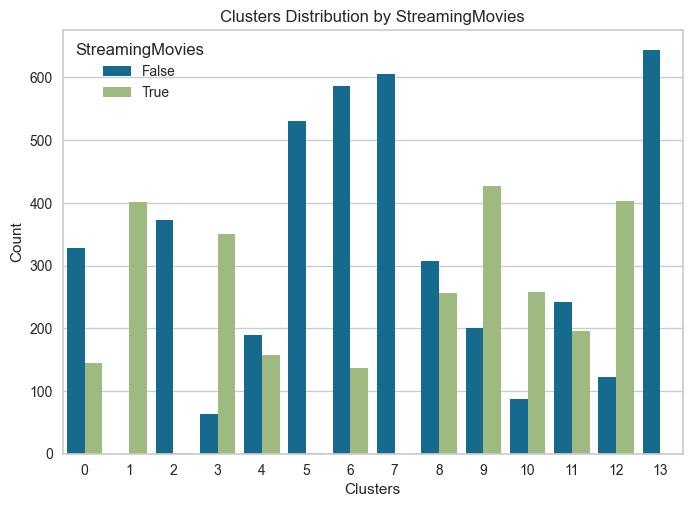

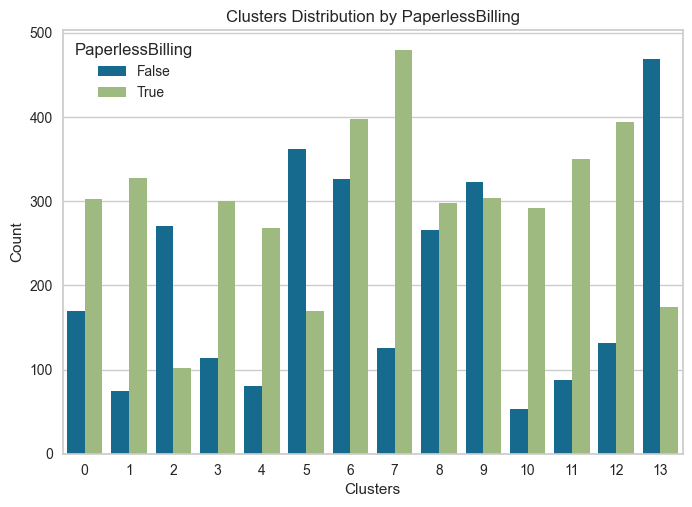

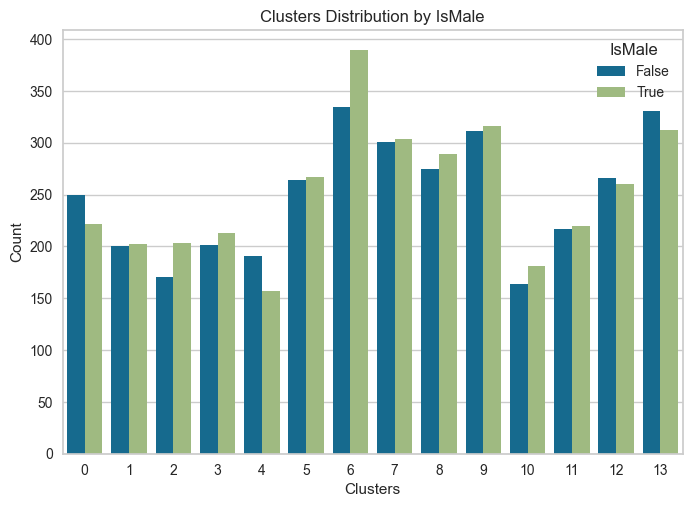

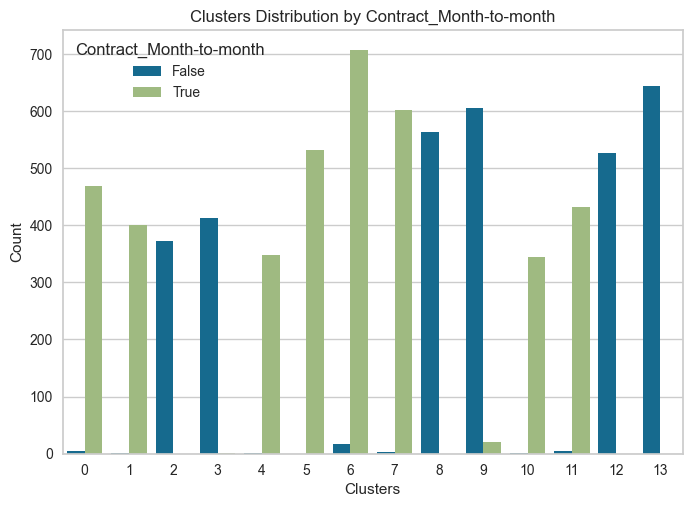

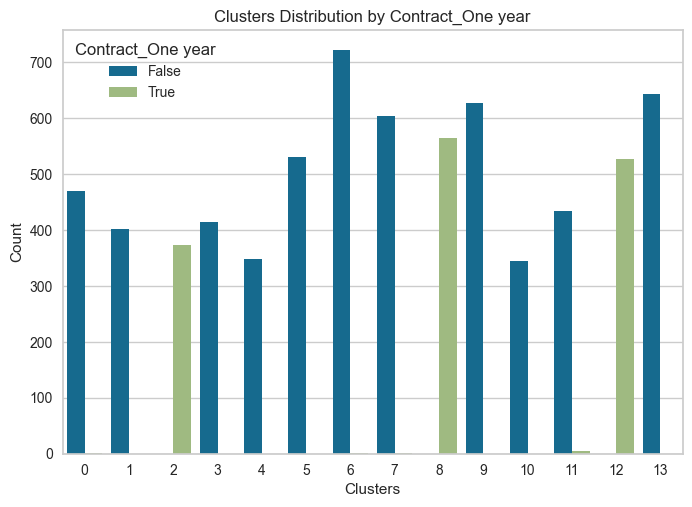

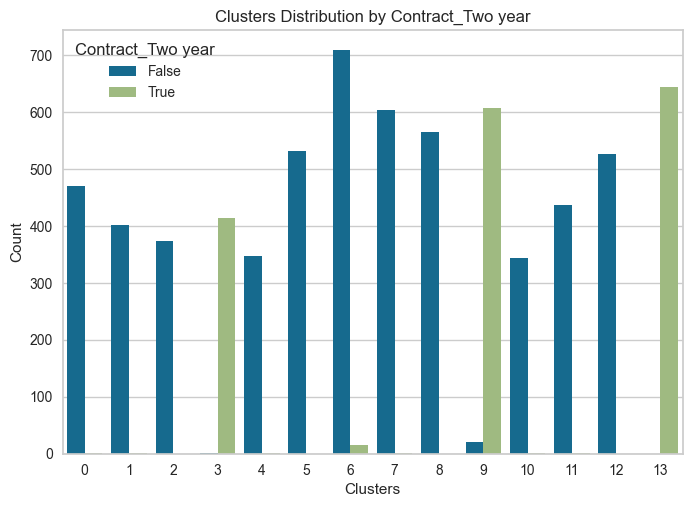

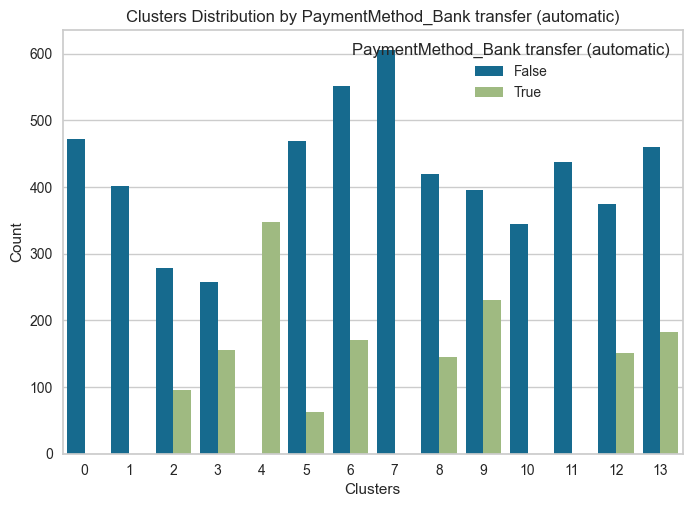

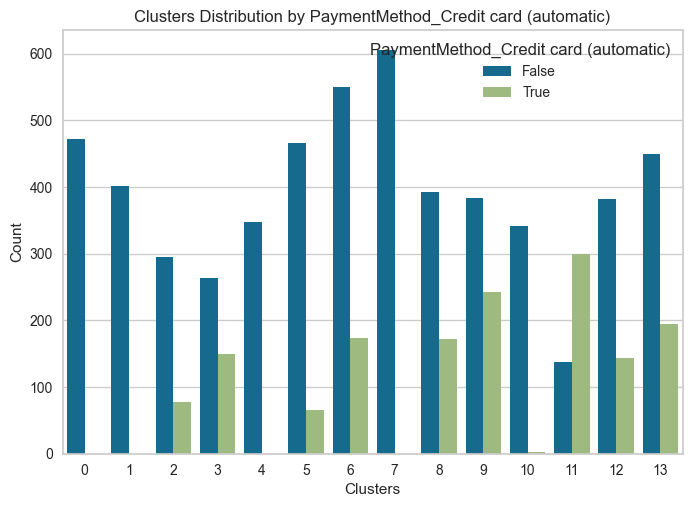

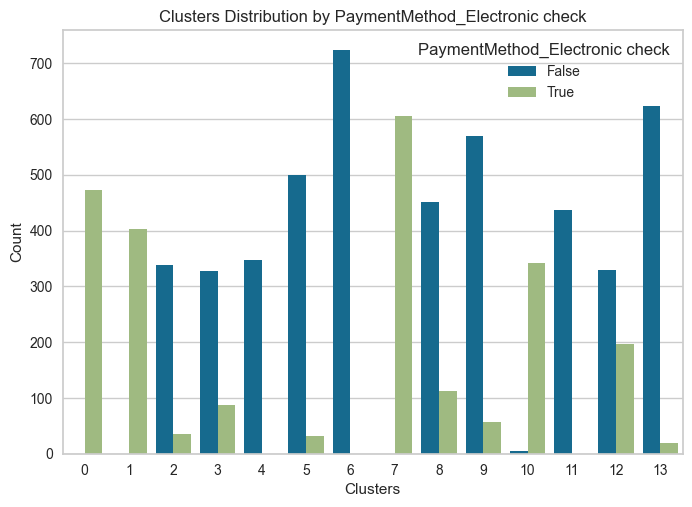

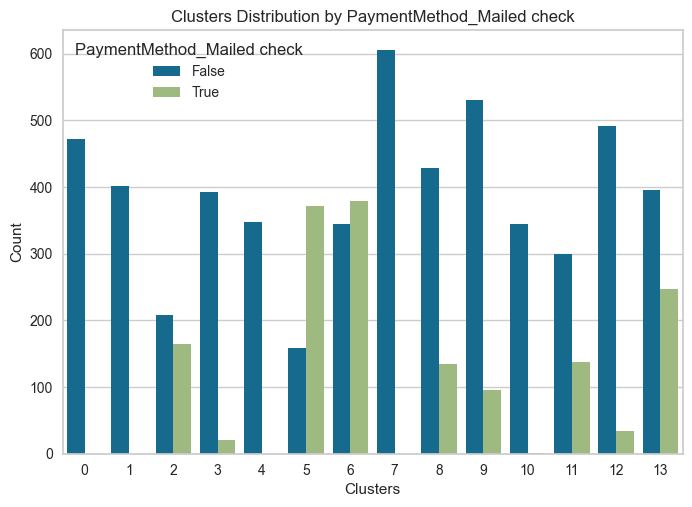

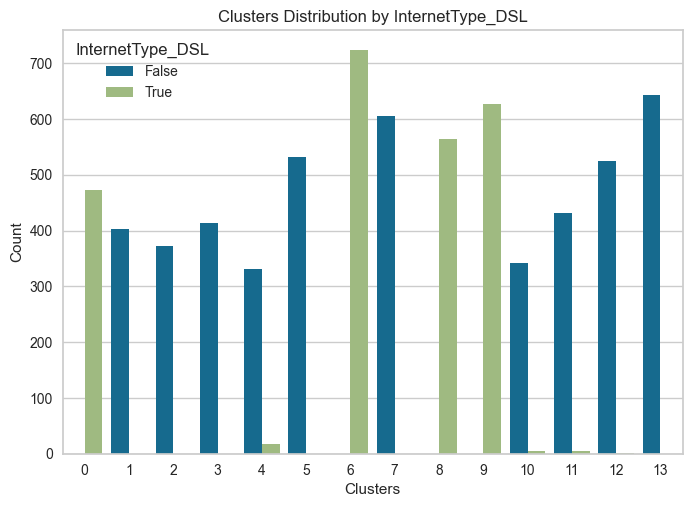

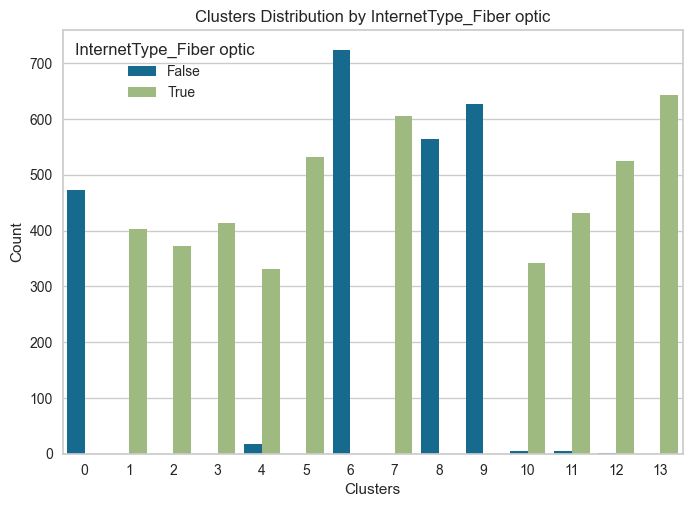

In [81]:
for col in bool_features:
    # bar plot of the clusters
    pl = sns.countplot(df_clustering, x='clusters', hue=col)
    plt.title(f'Clusters Distribution by {col}')
    plt.xlabel('Clusters')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.show()

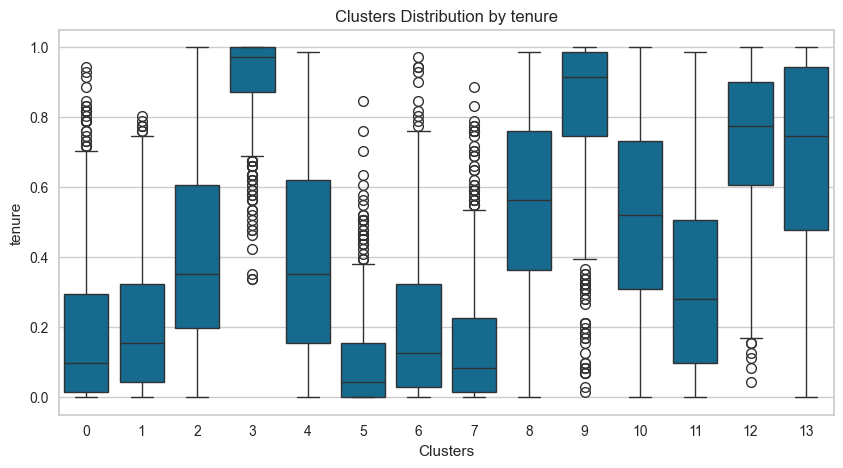

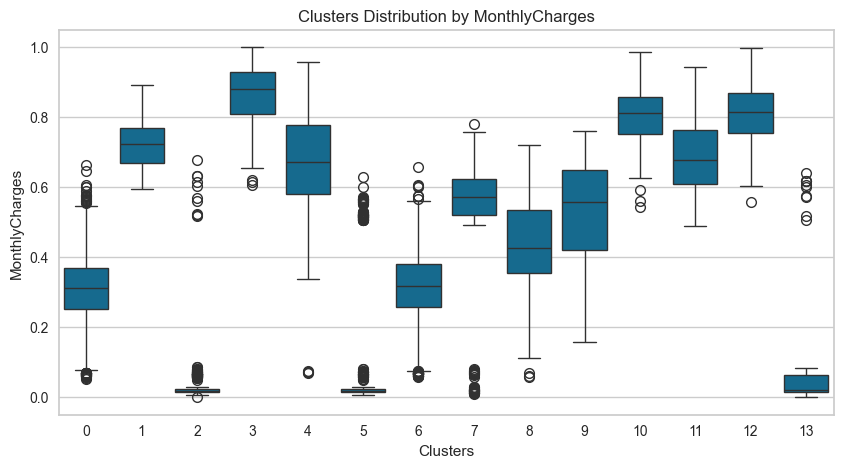

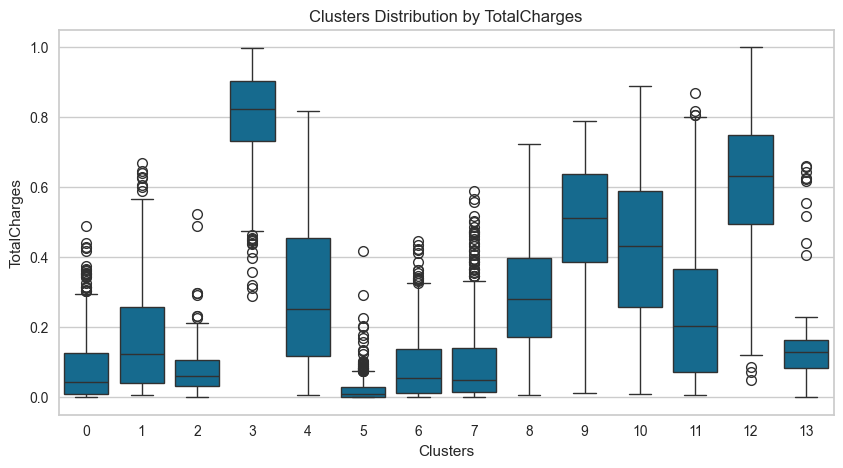

In [82]:
#box plots for numerical features

for col in num_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_clustering, x='clusters', y=col)
    plt.title(f'Clusters Distribution by {col}')
    plt.xlabel('Clusters')
    plt.ylabel(col)
    plt.show()



Clustering with PCA dataset

In [83]:
X_pca

array([[-0.44810725, -0.21527198,  1.31193326, ...,  0.48455553,
         0.11517217,  0.33246883],
       [-0.1059527 ,  1.05808933,  0.96107884, ..., -0.3688265 ,
         0.18816015, -0.10714927],
       [-0.50043719,  0.19396235,  1.41467252, ..., -0.25876072,
        -0.16761602,  0.11112491],
       ...,
       [-0.39164805,  0.19171488,  1.25189243, ...,  0.61488039,
         0.15470037,  0.11481145],
       [-0.8285045 , -0.55623008, -0.32846988, ..., -0.08468452,
         0.28704949,  0.29410308],
       [ 1.30593918,  0.03203691, -0.44043625, ..., -0.11025387,
         0.16955507, -0.14385102]])

## DBSCAN

## Hierirchical

# Classification

## Logistic Regression

## Decision Trees

## Random Forests

## Support Vector Machines

## Class imbalances

# Pattern Mining